## Business Problem:

**AIM:** _To reduce the risk of loan defaults, which can result in significant financial losses to the financial institutions. By detecting potential default risks early, lenders can take proactive measures to minimize the risk of default and protect their investments._

!pip install missingno

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (15, 8)

from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.svm import SVC

# import the XGBoost function for classification
from xgboost import XGBClassifier



## Supervised Learning Classification Problem-
   - **Target:** 
           Charged Off = 1
           Current = 0

### Read the dataset:

In [2]:
df_loan = pd.read_csv(r"C:\Users\VIP\Downloads\Loan Risk Detector (2).csv")
df_loan.head(3)

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,Source Verified,Sep-15,Charged Off,debt_consolidation,Debt consolidation,20.72,0,Sep-00,1,NaN,25,0,31578,77.0,42,w,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-16,0,NaN,INDIVIDUAL,NaN,NaN,0,0,52303,41000
1,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,Source Verified,Sep-15,Charged Off,debt_consolidation,Debt consolidation,24.57,0,Sep-02,0,36.0,13,1,5084,38.8,41,w,0.0,10043.49,9942.67,100.81,0.0,0.0,0.0,Oct-15,10059.00,NaN,Jan-16,0,79.0,INDIVIDUAL,NaN,NaN,0,332,175731,13100
2,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,Source Verified,Sep-15,Charged Off,debt_consolidation,Debt consolidation,32.41,0,Feb-06,1,NaN,18,0,12070,74.0,36,f,0.0,221.96,167.56,54.40,0.0,0.0,0.0,Oct-15,225.84,NaN,Jan-16,0,NaN,INDIVIDUAL,NaN,NaN,0,0,202012,16300


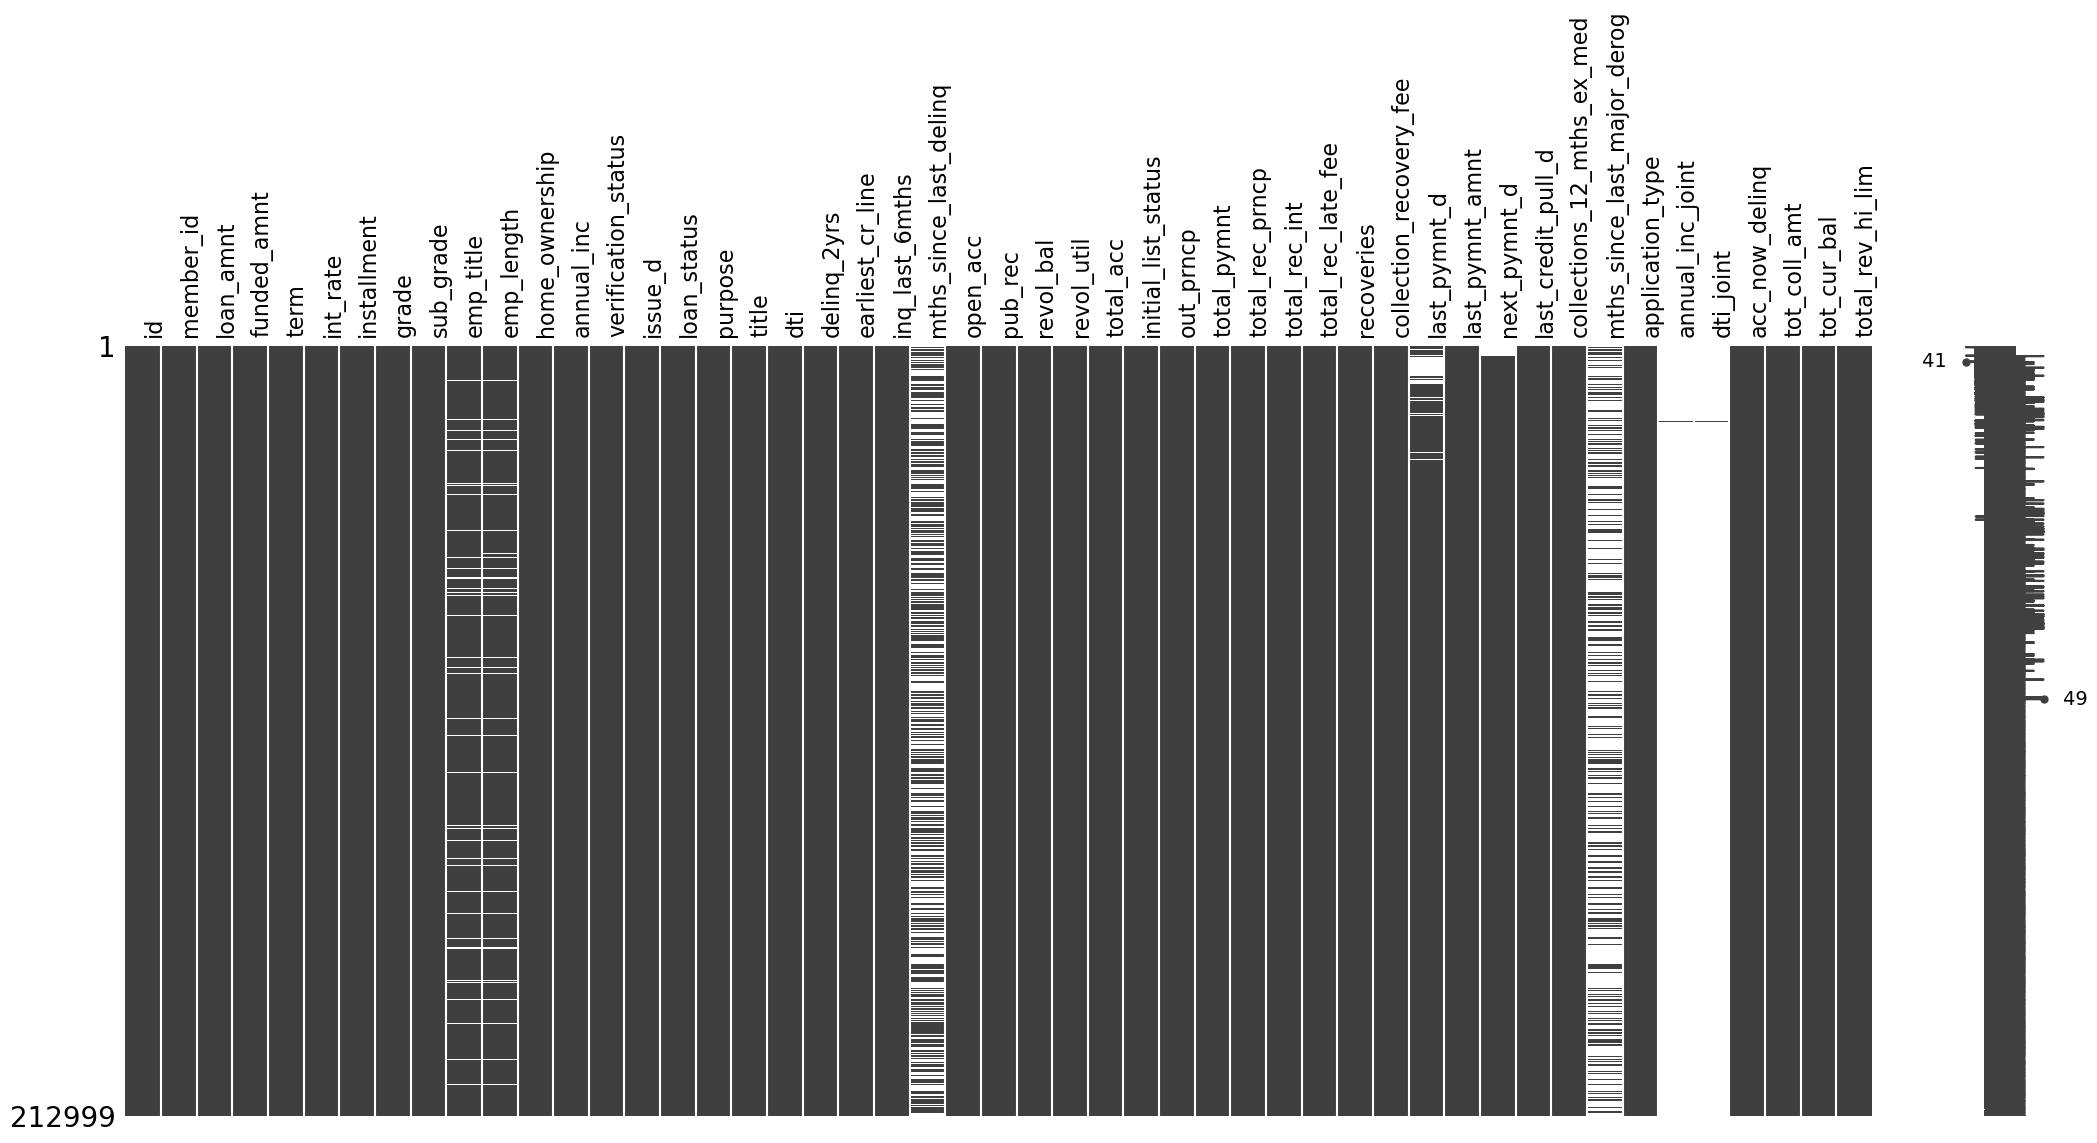

In [3]:
msno.matrix(df_loan, label_rotation=90)
plt.show()

In [4]:
loan = df_loan.copy(deep=True)

### Check size and datatypes:

In [5]:
df_loan.shape

(212999, 49)

**Interpretation:** 
- The data has 212999 observations and 49 attributes.
    - We created a copy of original dataset for further EDA.

In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           212999 non-null  int64  
 1   member_id                    212999 non-null  int64  
 2   loan_amnt                    212999 non-null  int64  
 3   funded_amnt                  212999 non-null  int64  
 4   term                         212999 non-null  object 
 5   int_rate                     212999 non-null  float64
 6   installment                  212999 non-null  float64
 7   grade                        212999 non-null  object 
 8   sub_grade                    212999 non-null  object 
 9   emp_title                    200209 non-null  object 
 10  emp_length                   200232 non-null  object 
 11  home_ownership               212999 non-null  object 
 12  annual_inc                   212999 non-null  float64
 13 

**Interpretation:** 
- There are 17 float, 15 int and 17 object values.

- **The variables** `id`, `member_id`, `loan_amnt`, `funded_amnt`, `int_rate`, `installment`, `annual_inc`, `dti`, `delinq_2yrs`, `inq_last_6mths`, `mths_since_last_delinq`, `open_acc`, `pub_rec`, `revol_bal`, `revol_util`, `total_acc`, `out_prncp`, `total_pymnt`, `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`, `last_pymnt_amnt`, `collections_12_mths_ex_med`, `mths_since_last_major_derog`, `annual_inc_joint`, `dti_joint`, `acc_now_delinq`, `tot_coll_amt`, `tot_cur_bal`, `total_rev_hi_lim` are **numerical**.

- **The variables** `term`, `grade`, `sub_grade`, `emp_title`, `emp_length`, `home_ownership`, `verification_status`, `issue_d`, `loan_status`, `purpose`, `title`, `earliest_cr_line`, `initial_list_status`, `last_pymnt_d`, `next_pymnt_d`, `last_credit_pull_d`, `application_type` are **objects**.

### Drop duplicate records:

In [7]:
loan.duplicated().value_counts()

False    212999
dtype: int64

- There are **no duplicate records** in our dataset.

### Drop Insignificant Features based on Domain Knowledge:

In [8]:
loan.drop(columns=['id','member_id','loan_amnt','sub_grade','emp_title','emp_length','verification_status','issue_d','purpose','title','mths_since_last_delinq','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d','mths_since_last_major_derog','application_type','annual_inc_joint','dti_joint','total_acc','collections_12_mths_ex_med'], inplace=True)

In [9]:
loan.shape

(212999, 28)

**Interpretation:**

The above variables are redundant for further analysis. Thus, we drop those columns.

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funded_amnt              212999 non-null  int64  
 1   term                     212999 non-null  object 
 2   int_rate                 212999 non-null  float64
 3   installment              212999 non-null  float64
 4   grade                    212999 non-null  object 
 5   home_ownership           212999 non-null  object 
 6   annual_inc               212999 non-null  float64
 7   loan_status              212999 non-null  object 
 8   dti                      212999 non-null  float64
 9   delinq_2yrs              212999 non-null  int64  
 10  earliest_cr_line         212999 non-null  object 
 11  inq_last_6mths           212999 non-null  int64  
 12  open_acc                 212999 non-null  int64  
 13  pub_rec                  212999 non-null  int64  
 14  revo

In [11]:
loan['loan_status'].value_counts()

Current        210226
Charged Off      2773
Name: loan_status, dtype: int64

### Missing Values Treatment:

In [12]:
(loan.isnull().sum()/len(loan))*100

funded_amnt                0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
home_ownership             0.000000
annual_inc                 0.000000
loan_status                0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.038498
out_prncp                  0.000000
total_pymnt                0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
acc_now_delinq             0.000000
tot_coll_amt               0.000000
tot_cur_bal                0.000000
total_rev_hi_lim           0

**Interpretation:** The plot shows that there are Null values present in `revol_util` column.

In [13]:
loan['revol_util'].isnull().sum()

82

In [14]:
loan.dropna(inplace=True)

In [15]:
loan['loan_status'].value_counts()

Current        210144
Charged Off      2773
Name: loan_status, dtype: int64

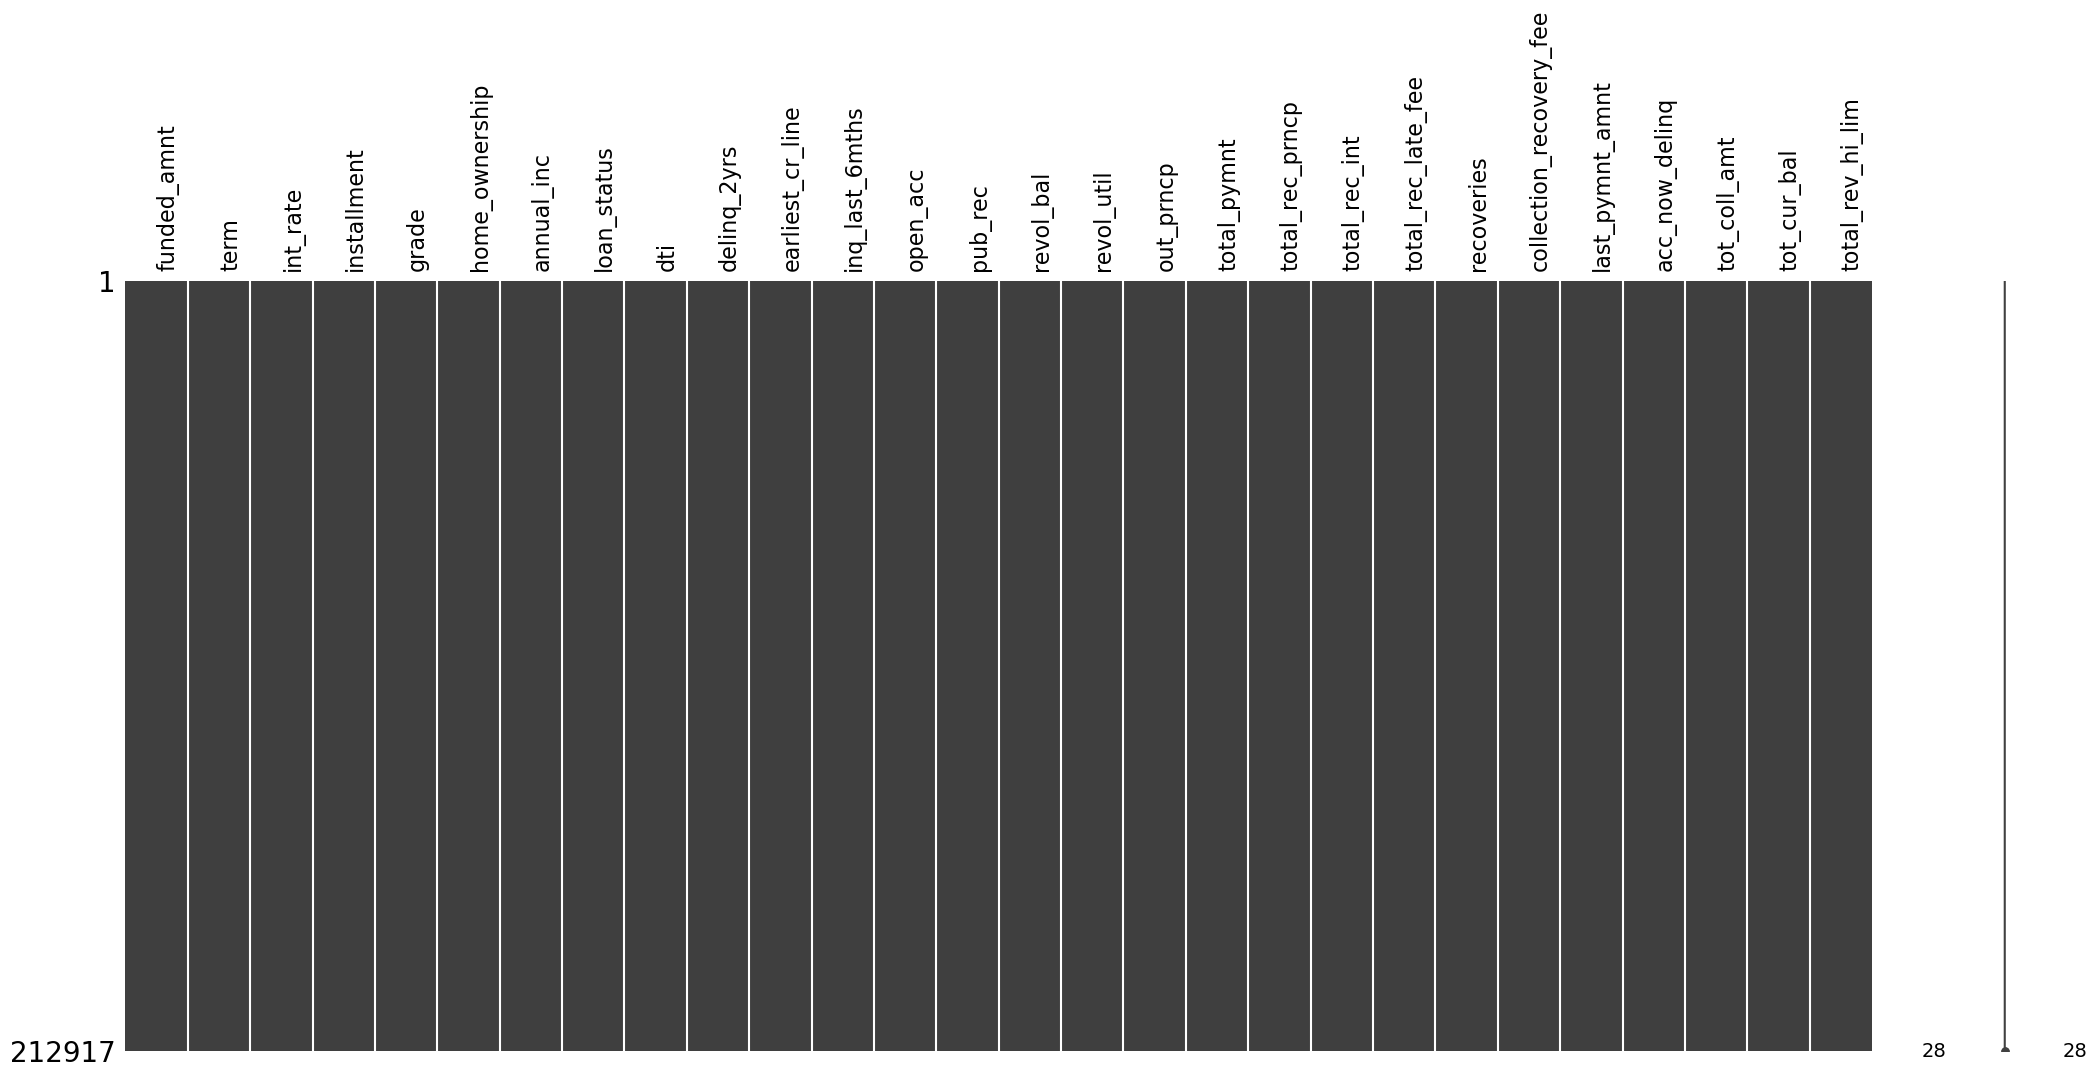

In [16]:
msno.matrix(loan, label_rotation=90)
plt.show()

In [17]:
loan.shape

(212917, 28)

**Intepretation:**
- `revol_util` has 3% of the missing values, so we decided to drop these records rather than imputing them with unknown values.
- After missing values treatment, our `loan_status` = Charged-Off is not affected and we still have Charged-Off as 1% out of total records.

### Convert datatypes to Numeric and Data Cleaning Process:
- **term**

In [18]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
loan['term'] = loan['term'].str.replace(' months', '').astype(int)

In [20]:
loan['term'].unique()

array([36, 60])

In [21]:
loan['term'].replace({36:0, 60:1}, inplace=True)

In [22]:
loan['term'].value_counts()

0    142970
1     69947
Name: term, dtype: int64

In [23]:
loan['term'].dtype

dtype('int32')

- `term` column has two values as 36 months and 60 months, so for better analysis we encoded `36 months = 0` and `60 months = 1`.

- **earliest_cr_line**

In [24]:
loan['earliest_cr_line'].unique()

array(['Sep-00', 'Sep-02', 'Feb-06', 'Oct-99', 'Nov-99', 'May-98',
       'Feb-84', 'Mar-09', 'Jun-04', 'Jul-00', 'Aug-97', 'Jul-85',
       'Apr-96', 'Oct-03', 'Aug-01', 'Feb-10', 'Aug-96', 'Aug-03',
       'Jan-97', 'Apr-98', 'Nov-08', 'Jun-83', 'Feb-00', 'Jul-96',
       'Nov-01', 'Jun-01', 'Feb-05', 'Oct-05', 'Mar-06', 'Nov-89',
       'Feb-97', 'Jan-92', 'May-02', 'Apr-06', 'Feb-11', 'Feb-98',
       'Aug-04', 'Sep-99', 'Oct-96', 'Nov-98', 'Sep-05', 'Aug-07',
       'Jan-05', 'Jun-00', 'Jul-08', 'Mar-02', 'Dec-98', 'Feb-07',
       'Dec-05', 'Jun-02', 'Jul-06', 'Dec-88', 'Nov-94', 'Nov-96',
       'Aug-11', 'Oct-95', 'Sep-03', 'Aug-02', 'Dec-84', 'Jun-95',
       'Oct-00', 'Dec-87', 'Feb-78', 'Feb-04', 'Oct-01', 'Mar-05',
       'Sep-97', 'Mar-01', 'Jan-81', 'Mar-98', 'Mar-00', 'Mar-03',
       'Mar-08', 'Mar-85', 'Nov-10', 'Aug-89', 'Dec-11', 'Dec-89',
       'Dec-02', 'May-99', 'Jan-87', 'Sep-08', 'Oct-04', 'Nov-00',
       'Sep-95', 'Aug-94', 'Jul-07', 'Jun-86', 'Jan-76', 'Apr-

In [25]:
loan['earliest_cr_line'] = loan['earliest_cr_line'].str.split('-', expand=True)[1]

In [26]:
loan['earliest_cr_line'].unique()

array(['00', '02', '06', '99', '98', '84', '09', '04', '97', '85', '96',
       '03', '01', '10', '08', '83', '05', '89', '92', '11', '07', '88',
       '94', '95', '87', '78', '81', '86', '76', '93', '90', '77', '91',
       '12', '79', '75', '67', '70', '74', '73', '64', '69', '82', '71',
       '80', '63', '65', '62', '72', '66', '68', '60', '61', '58', '59',
       '50', '55', '53', '56', '57', '51'], dtype=object)

- Since earliest_cr_line is `object` datatype, we will first convert it to `string`.

In [27]:
loan['earliest_cr_line'] = loan['earliest_cr_line'].convert_dtypes(convert_string=True)

In [28]:
def earliest_cr_line_year(x):
    if (x[0] == '0') or (x[0] == '1'):
        return '20'+x
    if (x[0] == '5') or (x[0] == '6') or (x[0] == '7') or (x[0] == '8') or (x[0] == '9'):
        return '19'+x

In [29]:
loan['cr_year'] = loan['earliest_cr_line'].map(earliest_cr_line_year)

In [30]:
loan['cr_year'].unique()

array(['2000', '2002', '2006', '1999', '1998', '1984', '2009', '2004',
       '1997', '1985', '1996', '2003', '2001', '2010', '2008', '1983',
       '2005', '1989', '1992', '2011', '2007', '1988', '1994', '1995',
       '1987', '1978', '1981', '1986', '1976', '1993', '1990', '1977',
       '1991', '2012', '1979', '1975', '1967', '1970', '1974', '1973',
       '1964', '1969', '1982', '1971', '1980', '1963', '1965', '1962',
       '1972', '1966', '1968', '1960', '1961', '1958', '1959', '1950',
       '1955', '1953', '1956', '1957', '1951'], dtype=object)

In [31]:
loan['earliest_cr_line'] = loan['cr_year'].astype(int)

In [32]:
loan['earliest_cr_line'].dtypes

dtype('int32')

In [33]:
loan.drop(columns=['cr_year'], inplace=True)

- **loan_status**

In [34]:
loan['loan_status'].replace({'Current':0, 'Charged Off':1}, inplace=True)

In [35]:
loan['loan_status'].value_counts()

0    210144
1      2773
Name: loan_status, dtype: int64

In [36]:
loan['loan_status'].dtypes

dtype('int64')

**Interpretation:**

- But according to the data definition, `term` is interpreted as `object`, so we will extract month from this variable and convert data type to `int`.

- Similarly, `earliest_cr_line` is interpreted as `object`, so we will extract year from this variable and convert data type to `int`.

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212917 entries, 0 to 212998
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funded_amnt              212917 non-null  int64  
 1   term                     212917 non-null  int32  
 2   int_rate                 212917 non-null  float64
 3   installment              212917 non-null  float64
 4   grade                    212917 non-null  object 
 5   home_ownership           212917 non-null  object 
 6   annual_inc               212917 non-null  float64
 7   loan_status              212917 non-null  int64  
 8   dti                      212917 non-null  float64
 9   delinq_2yrs              212917 non-null  int64  
 10  earliest_cr_line         212917 non-null  int32  
 11  inq_last_6mths           212917 non-null  int64  
 12  open_acc                 212917 non-null  int64  
 13  pub_rec                  212917 non-null  int64  
 14  revo

**Interpretation:** 
- The data has `212917` observations and `28` attributes.
- There are 13 float, 12 int and 3 object values.

In [38]:
loan.head()

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,0,12.29,667.06,C,OWN,65000.0,1,20.72,0,2000,1,25,0,31578,77.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0,0,52303,41000
1,11000,0,12.69,369.00,C,MORTGAGE,40000.0,1,24.57,0,2002,0,13,1,5084,38.8,0.0,10043.49,9942.67,100.81,0.0,0.0,0.0,10059.00,0,332,175731,13100
2,7000,0,9.99,225.84,B,MORTGAGE,32000.0,1,32.41,0,2006,1,18,0,12070,74.0,0.0,221.96,167.56,54.40,0.0,0.0,0.0,225.84,0,0,202012,16300
3,10000,0,10.99,327.34,B,MORTGAGE,48000.0,1,30.98,0,1999,2,18,0,22950,66.0,0.0,315.13,235.76,79.37,0.0,0.0,0.0,327.34,0,0,108235,34750
4,9550,0,19.99,354.87,E,RENT,32376.0,1,32.54,0,1999,3,9,0,4172,29.6,0.0,333.66,195.78,137.88,0.0,0.0,0.0,354.87,0,0,45492,14100


### 5-Point Summary for Numeric and Categorical Data:

In [39]:
# 5-point summary of numeric variables

loan.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt,212917.0,15258.708910,8611.239249,1000.00,8500.00,14000.00,20000.00,3.500000e+04
term,212917.0,0.328518,0.469675,0.00,0.00,0.00,1.00,1.000000e+00
int_rate,212917.0,12.400560,4.248986,5.32,9.17,12.29,14.65,2.899000e+01
installment,212917.0,440.851359,245.836263,30.12,262.23,382.87,578.79,1.445460e+03
annual_inc,212917.0,77792.383591,81877.734734,0.00,47000.00,65000.00,92500.00,9.000000e+06
loan_status,212917.0,0.013024,0.113377,0.00,0.00,0.00,0.00,1.000000e+00
dti,212917.0,19.361862,31.931499,0.00,12.66,18.72,25.52,9.999000e+03
delinq_2yrs,212917.0,0.347328,0.920960,0.00,0.00,0.00,0.00,3.000000e+01
earliest_cr_line,212917.0,1998.344228,7.643860,1950.00,1994.00,2000.00,2004.00,2.012000e+03
inq_last_6mths,212917.0,0.564901,0.861789,0.00,0.00,0.00,1.00,5.000000e+00


**Interpretation:** 
- We can find the below details for all the numeric columns:
    - minimum value
    - maximum value
    - median value
    - Q1 and Q3 values
    - average value

In [40]:
# 5-point summary of categorical variables

loan.describe(include=object)

,grade,home_ownership
count,212917,212917
unique,7,4
top,B,MORTGAGE
freq,62645,105961


**Interpretation:** 
- We can find the below details for all the categorical columns:
    - total count of each categorical column
    - unique values in each categorical column
    - top category and its frequency

### Checking for Significant Features:
1) Analyis of `delinq_2yrs` : **Number of delinquencies(late installment payment) by the borrower in the past 2 years** column-

In [41]:
loan['delinq_2yrs'].value_counts()

0     168748
1      28989
2       8633
3       3247
4       1504
5        749
6        418
7        215
8        138
9         77
10        69
11        46
12        25
13        23
14        10
15        10
16         8
18         2
17         2
26         2
30         1
20         1
Name: delinq_2yrs, dtype: int64

In [42]:
def delinq_2yrs_levels(x):
    if x==1 or x==2:
        return 'Early Stage'
    elif x==3 or x==4:
        return 'Moderate'
    elif x>=5:
        return 'Severe'
    else:
        return 'Clean'

In [43]:
loan['delinq_2yrs'] = loan['delinq_2yrs'].apply(delinq_2yrs_levels)

In [44]:
del_2yrs = pd.DataFrame({'Count':loan['delinq_2yrs'].value_counts(),
           'Proportion(%)':round(loan['delinq_2yrs'].value_counts(normalize=True)*100,2)})
del_2yrs

,Count,Proportion(%)
Clean,168748,79.26
Early Stage,37622,17.67
Moderate,4751,2.23
Severe,1796,0.84


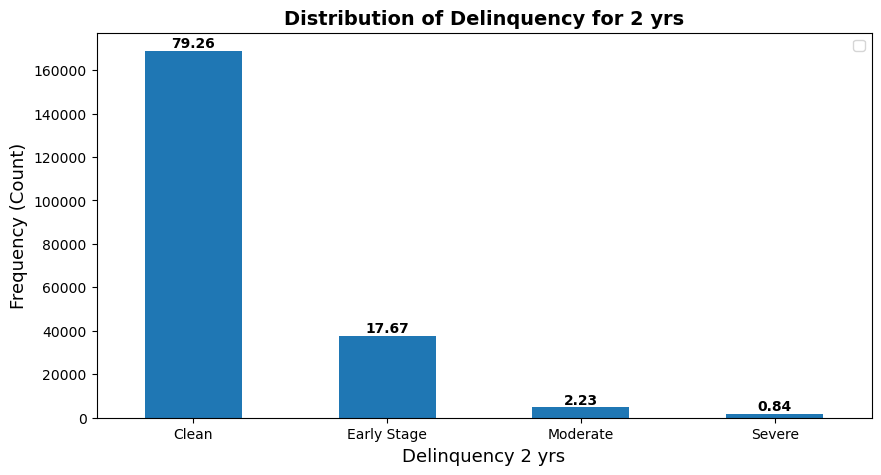

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
del_2yrs.plot(kind='bar', y='Count', ax=ax)
plt.xlabel('Delinquency 2 yrs', fontsize = 13)
plt.ylabel('Frequency (Count)', fontsize = 13)
plt.yticks()
plt.title('Distribution of Delinquency for 2 yrs', fontsize=14, fontweight=550)

plt.xticks(rotation = 'horizontal')
plt.legend('')

for x,y in enumerate(del_2yrs['Count']):
    delinq_value = del_2yrs.index[x]
    plt.text(x, y+1500, del_2yrs['Proportion(%)'].loc[delinq_value], horizontalalignment='center', fontweight=700)

plt.show()

**Inference:**
- The distribution of delinquencies in past 2 years for Non-Defaulters (Current) is ~79% and distribution for Defaulters (Charged-Off) is remaining ~21%.  We have split Defaulters in three sub categories for futher analysis.
- Although the distribution is imbalanced it still looks good for the purpose of this analysis as the frequency (counts) values are not small.

**Actions:**
- Perform dummy encoding during training.

2) Analysis of `pub_rec` : **Number of derogatory public records** column-

In [46]:
loan['pub_rec'].value_counts()

0     175241
1      30458
2       4701
3       1472
4        517
5        235
6        127
7         51
8         50
10        15
9         14
11         9
12         7
13         5
16         3
15         2
21         2
23         1
26         1
17         1
28         1
86         1
18         1
14         1
19         1
Name: pub_rec, dtype: int64

In [47]:
def pub_rec_levels(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

In [48]:
loan['pub_rec'] = loan['pub_rec'].map(pub_rec_levels)

In [49]:
pub_rec = pd.DataFrame({'Count':loan['pub_rec'].value_counts(),
                       'Proportion(%)':round(loan['pub_rec'].value_counts(normalize=True)*100, 2)})
pub_rec

,Count,Proportion(%)
No,175241,82.3
Yes,37676,17.7


In [50]:
loan['pub_rec'].value_counts()

No     175241
Yes     37676
Name: pub_rec, dtype: int64

In [51]:
pub_recs = pd.DataFrame({'Count':loan['pub_rec'].value_counts(),
           'Proportion(%)':round(loan['pub_rec'].value_counts(normalize=True)*100,2)})
pub_recs

,Count,Proportion(%)
No,175241,82.3
Yes,37676,17.7


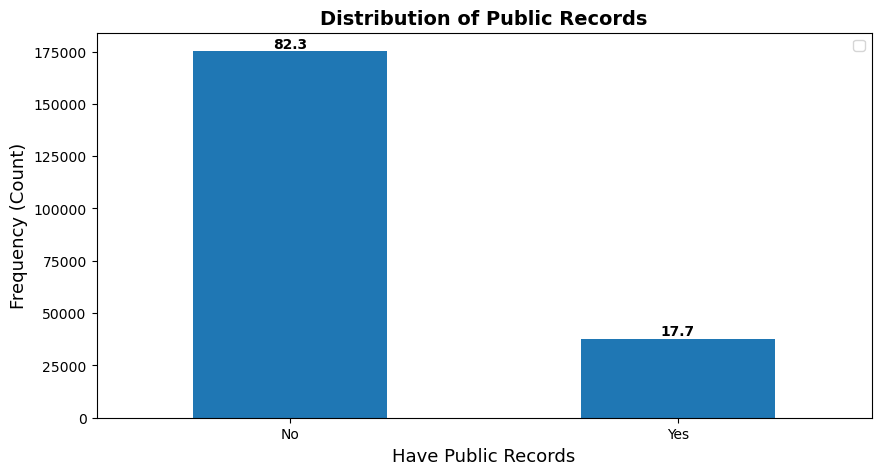

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
pub_recs.plot(kind='bar', y='Count', ax=ax)
plt.xlabel('Have Public Records', fontsize = 13)
plt.ylabel('Frequency (Count)', fontsize = 13)
plt.yticks()
plt.title('Distribution of Public Records', fontsize=14, fontweight=550)
plt.xticks(rotation = 'horizontal')
plt.legend('')

for x,y in enumerate(pub_recs['Count']):
    pubrec_value = pub_recs.index[x]
    plt.text(x, y+1500, pub_recs['Proportion(%)'].loc[pubrec_value], horizontalalignment='center', fontweight=700)

plt.show()

**Inference:**
- The distribution of number of derogatory public records for Non-Defaulters (Current) is ~82% and distribution for Defaulters (Charged-Off) is remaining ~18%.
- Although the distribution is imbalanced it still looks good for the purpose of this analysis to see its influence on target variable.

**Actions:**
- Perform dummy encoding during training.

3) Analysis of `recoveries` : **Total recovery procedures initiated against the borrower** column-

In [53]:
loan['recoveries'].value_counts()

0.00        212611
1053.50          2
1000.00          2
2837.22          1
1066.57          1
5008.00          1
2828.46          1
519.70           1
2996.97          1
2009.93          1
1441.94          1
3169.93          1
1079.85          1
527.54           1
5890.29          1
3189.20          1
5902.57          1
3418.67          1
654.20           1
2696.98          1
1595.16          1
1322.93          1
6057.97          1
2098.90          1
2585.51          1
4433.99          1
1190.81          1
5360.15          1
1572.19          1
2009.33          1
1700.70          1
4683.56          1
3896.31          1
997.60           1
2529.67          1
3555.63          1
3251.56          1
2640.13          1
2799.45          1
1524.11          1
4180.91          1
5543.65          1
4280.05          1
4559.71          1
1221.41          1
2359.18          1
596.56           1
1103.41          1
5508.34          1
6162.58          1
1819.35          1
5511.39          1
2473.49     

In [54]:
def recoveries_levels(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

In [55]:
loan['recoveries'] = loan['recoveries'].map(recoveries_levels)

In [56]:
rec_prop = pd.DataFrame({'Count':loan['recoveries'].value_counts(),
                       'Proportion(%)':round(loan['recoveries'].value_counts(normalize=True)*100, 2)})
rec_prop

,Count,Proportion(%)
No,212611,99.86
Yes,306,0.14


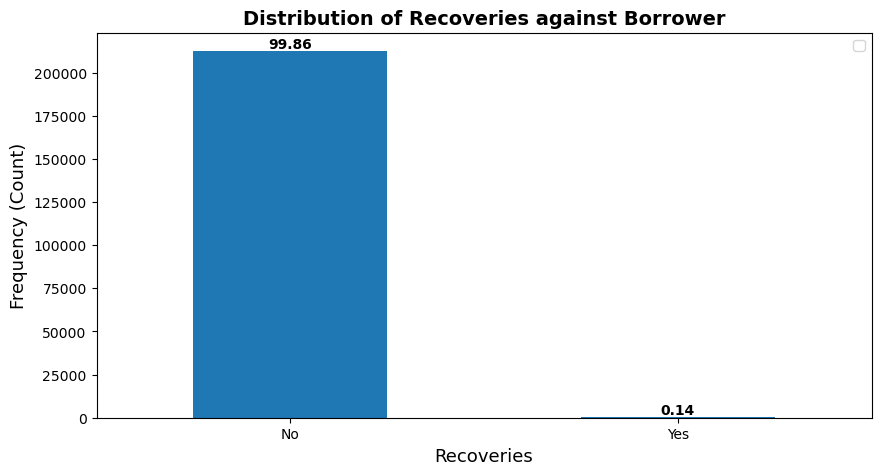

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
rec_prop.plot(kind='bar', y='Count', ax=ax)
plt.xlabel('Recoveries', fontsize = 13)
plt.ylabel('Frequency (Count)', fontsize = 13)
plt.yticks()
plt.title('Distribution of Recoveries against Borrower', fontsize=14, fontweight=550)
plt.xticks(rotation = 'horizontal')
plt.legend('')

for x,y in enumerate(rec_prop['Count']):
    rec_value = rec_prop.index[x]
    plt.text(x, y+1500, rec_prop['Proportion(%)'].loc[rec_value], horizontalalignment='center', fontweight=700)

plt.show()

**Inference:**

- The distribution is extremely imbalanced and the frequency (counts) value of 'Non-Recoveries' is almost 0 and thus will not add value (information) to our analysis.

**Actions:**

- Drop the feature `recoveries`.

4) Analysis of `collection_recovery_fee` : **The fees collected during the recovery procedures** column-

In [58]:
loan['collection_recovery_fee'].value_counts()

0.0000       212616
189.6300          2
180.0000          2
361.7874          1
485.4564          1
191.9826          1
901.4400          1
28.2846           1
93.5460           1
539.4546          1
259.5492          1
238.1274          1
510.6996          1
570.5874          1
94.9572           1
1060.2522         1
574.0560          1
1062.4626         1
615.3606          1
194.3730          1
475.2234          1
287.1288          1
503.9010          1
174.8844          1
377.8020          1
465.3918          1
44.3399           1
214.3458          1
964.8270          1
282.9942          1
361.6794          1
306.1260          1
843.0408          1
38.9631           1
179.5680          1
455.3406          1
640.0134          1
585.2808          1
117.7560          1
1090.4346         1
839.4210          1
752.5638          1
997.8570          1
641.5200          1
770.4090          1
820.7478          1
219.8538          1
424.6524          1
107.3808          1
198.6138          1


In [59]:
def crf_levels(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

In [60]:
loan['collection_recovery_fee'] = loan['collection_recovery_fee'].map(crf_levels)

In [61]:
crf_prop = pd.DataFrame({'Count':loan['collection_recovery_fee'].value_counts(),
                       'Proportion(%)':round(loan['collection_recovery_fee'].value_counts(normalize=True)*100, 2)})
crf_prop

,Count,Proportion(%)
No,212616,99.86
Yes,301,0.14


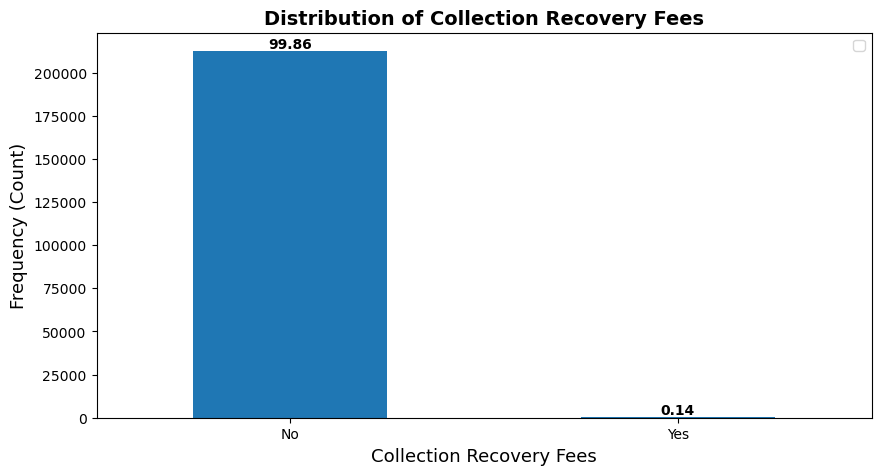

In [62]:
fig, ax = plt.subplots(figsize=(10,5))
crf_prop.plot(kind='bar', y='Count', ax=ax)
plt.xlabel('Collection Recovery Fees', fontsize = 13)
plt.ylabel('Frequency (Count)', fontsize = 13)
plt.yticks()
plt.title('Distribution of Collection Recovery Fees', fontsize=14, fontweight=550)
plt.xticks(rotation = 'horizontal')
plt.legend('')

for x,y in enumerate(crf_prop['Count']):
    crf_value = crf_prop.index[x]
    plt.text(x, y+1500, crf_prop['Proportion(%)'].loc[crf_value], horizontalalignment='center', fontweight=700)

plt.show()

**Inference:**

- The distribution is extremely imbalanced and the frequency (counts) value of 'Non-Recoveries' is almost 0 and thus will not add value (information) to our analysis.

**Actions:**

- Drop the feature `collection_recovery_fee`.

5) Analysis of `acc_now_delinq` : **Number of accounts on which the borrower is now delinquent** column-

In [63]:
loan['acc_now_delinq'].value_counts()

0    211776
1      1076
2        57
3         5
4         2
5         1
Name: acc_now_delinq, dtype: int64

In [64]:
def and_levels(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

In [65]:
loan['acc_now_delinq'] = loan['acc_now_delinq'].map(and_levels)

In [66]:
and_prop = pd.DataFrame({'Count':loan['acc_now_delinq'].value_counts(),
                       'Proportion(%)':round(loan['acc_now_delinq'].value_counts(normalize=True)*100, 2)})
and_prop

,Count,Proportion(%)
No,211776,99.46
Yes,1141,0.54


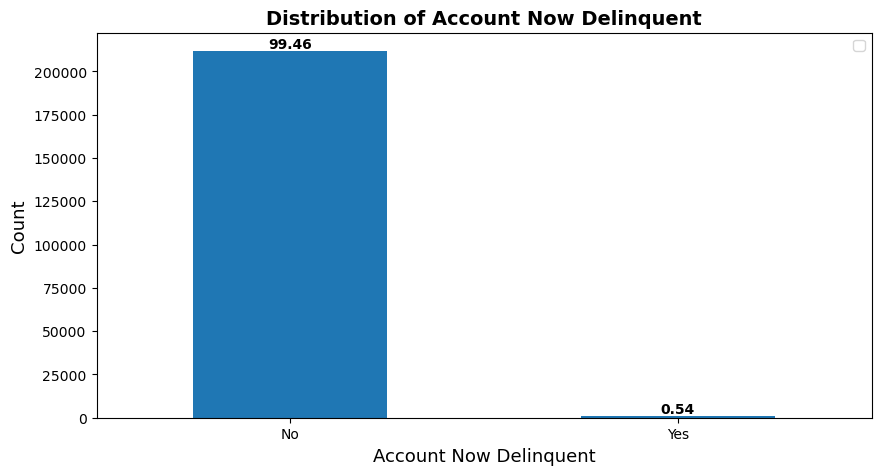

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
and_prop.plot(kind='bar', y='Count', ax=ax)
plt.xlabel('Account Now Delinquent', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.yticks()
plt.title('Distribution of Account Now Delinquent', fontsize=14, fontweight=550)
plt.xticks(rotation = 'horizontal')
plt.legend('')

for x,y in enumerate(and_prop['Count']):
    and_value = and_prop.index[x]
    plt.text(x, y+1500, and_prop['Proportion(%)'].loc[and_value], horizontalalignment='center', fontweight=700)

plt.show()

**Inference:**

- The distribution is extremely imbalanced and the frequency (counts) value of 'Non-Recoveries' is 0.5% only and thus will not add value (information) to our analysis.

**Actions:**

- Drop the feature `acc_now_delinq`.

6) Analysis of `inq_last_6mths` : **Inquiries for loans made by the borrower over the past 6 months** column-

In [68]:
loan['inq_last_6mths'].value_counts()

0    130654
1     55630
2     18170
3      6130
4      1748
5       585
Name: inq_last_6mths, dtype: int64

In [69]:
def inq_levels(x):
    if x==1 or x==2:
        return 'Low '
    elif x>=3:
        return 'High'
    else:
        return 'No'

In [70]:
loan['inq_last_6mths'] = loan['inq_last_6mths'].map(inq_levels)

In [71]:
inq_prop = pd.DataFrame({'Count':loan['inq_last_6mths'].value_counts(),
                       'Proportion(%)':round(loan['inq_last_6mths'].value_counts(normalize=True)*100, 2)})
inq_prop

,Count,Proportion(%)
No,130654,61.36
Low,73800,34.66
High,8463,3.97


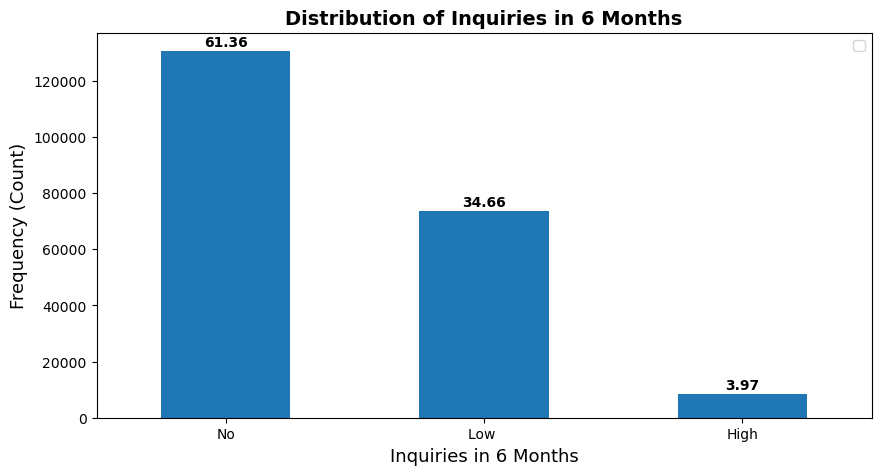

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
inq_prop.plot(kind='bar', y='Count', ax=ax)
plt.xlabel('Inquiries in 6 Months', fontsize = 13)
plt.ylabel('Frequency (Count)', fontsize = 13)
plt.yticks()
plt.title('Distribution of Inquiries in 6 Months', fontsize=14, fontweight=550)
plt.xticks(rotation = 'horizontal')
plt.legend('')

for x,y in enumerate(inq_prop['Count']):
    inq_value = inq_prop.index[x]
    plt.text(x, y+1500, inq_prop['Proportion(%)'].loc[inq_value], horizontalalignment='center', fontweight=700)

plt.show()

**Inference:** 
- The dataset seems to have imbalanced class distribution with -
        ~61% - No Inquiries
        ~35% - Low risk level Inquiries
        ~4%  - High risk level Inquiries
It still looks good for the purpose of this analysis as the frequency (counts) values are not small.

**Actions:**  
- No action.

7) Analysis of `home_ownership` : **The home ownership status provided by the borrower during registration or obtained from the credit report** column-

In [73]:
loan['home_ownership'].value_counts()

MORTGAGE    105961
RENT         83425
OWN          23529
ANY              2
Name: home_ownership, dtype: int64

In [74]:
loan[loan['home_ownership']=='ANY']

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
20663,34300,0,14.48,1180.31,C,ANY,78000.0,0,17.71,Clean,1978,No,10,No,26312,42.6,34300.0,0.00,0.0,0.00,0.0,No,No,0.00,No,0,319768,86000
190593,24000,1,16.55,590.68,D,ANY,77500.0,0,34.05,Clean,2004,Low,13,No,7151,34.5,22387.2,3499.95,1612.8,1887.15,0.0,No,No,590.68,No,0,91938,20700


In [75]:
loan = loan.drop(loan[loan['home_ownership'] == 'ANY'].index)

In [76]:
loan['home_ownership'].value_counts()

MORTGAGE    105961
RENT         83425
OWN          23529
Name: home_ownership, dtype: int64

In [77]:
ho_prop = pd.DataFrame({'Count':loan['home_ownership'].value_counts(),
                       'Proportion(%)':round(loan['home_ownership'].value_counts(normalize=True)*100, 2)})
ho_prop

,Count,Proportion(%)
MORTGAGE,105961,49.77
RENT,83425,39.18
OWN,23529,11.05


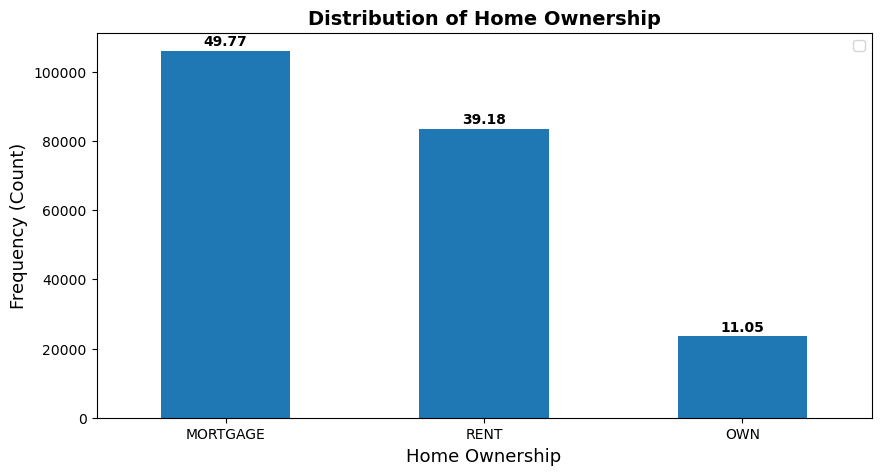

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
ho_prop.plot(kind='bar', y='Count', ax=ax)
plt.xlabel('Home Ownership', fontsize = 13)
plt.ylabel('Frequency (Count)', fontsize = 13)
plt.yticks()
plt.title('Distribution of Home Ownership', fontsize=14, fontweight=550)
plt.xticks(rotation = 'horizontal')
plt.legend('')

for x,y in enumerate(ho_prop['Count']):
    ho_value = ho_prop.index[x]
    plt.text(x, y+1500, ho_prop['Proportion(%)'].loc[ho_value], horizontalalignment='center', fontweight=700)

plt.show()

**Inference:** 
- The dataset seems to have slightly imbalanced class distribution with -
        ~50% - Mortgage Homes
        ~39% - Rented Homes
        ~11% - Own Homes
It still looks good for the purpose of this analysis as the frequency (counts) values are not small.

**Actions:**  
- No action.

In [79]:
loan.head()

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,0,12.29,667.06,C,OWN,65000.0,1,20.72,Clean,2000,Low,25,No,31578,77.0,0.0,0.00,0.00,0.00,0.0,No,No,0.00,No,0,52303,41000
1,11000,0,12.69,369.00,C,MORTGAGE,40000.0,1,24.57,Clean,2002,No,13,Yes,5084,38.8,0.0,10043.49,9942.67,100.81,0.0,No,No,10059.00,No,332,175731,13100
2,7000,0,9.99,225.84,B,MORTGAGE,32000.0,1,32.41,Clean,2006,Low,18,No,12070,74.0,0.0,221.96,167.56,54.40,0.0,No,No,225.84,No,0,202012,16300
3,10000,0,10.99,327.34,B,MORTGAGE,48000.0,1,30.98,Clean,1999,Low,18,No,22950,66.0,0.0,315.13,235.76,79.37,0.0,No,No,327.34,No,0,108235,34750
4,9550,0,19.99,354.87,E,RENT,32376.0,1,32.54,Clean,1999,High,9,No,4172,29.6,0.0,333.66,195.78,137.88,0.0,No,No,354.87,No,0,45492,14100


In [80]:
loan.drop(columns=['recoveries','collection_recovery_fee','acc_now_delinq'], inplace=True)

In [81]:
loan.shape

(212915, 25)

**Interpretation:**

Based on above analysis we droped redundant features - `recoveries`, `collection_recovery_fee`, `acc_now_delinq`.

In [82]:
# final dataset for further analysis

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212915 entries, 0 to 212998
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amnt         212915 non-null  int64  
 1   term                212915 non-null  int32  
 2   int_rate            212915 non-null  float64
 3   installment         212915 non-null  float64
 4   grade               212915 non-null  object 
 5   home_ownership      212915 non-null  object 
 6   annual_inc          212915 non-null  float64
 7   loan_status         212915 non-null  int64  
 8   dti                 212915 non-null  float64
 9   delinq_2yrs         212915 non-null  object 
 10  earliest_cr_line    212915 non-null  int32  
 11  inq_last_6mths      212915 non-null  object 
 12  open_acc            212915 non-null  int64  
 13  pub_rec             212915 non-null  object 
 14  revol_bal           212915 non-null  int64  
 15  revol_util          212915 non-nul

### Univariate Analysis:
#### 1. Univariate Anlysis for Categorical Features -

In [83]:
loan_cat = loan.select_dtypes(object)
loan_cat.head()

,grade,home_ownership,delinq_2yrs,inq_last_6mths,pub_rec
0,C,OWN,Clean,Low,No
1,C,MORTGAGE,Clean,No,Yes
2,B,MORTGAGE,Clean,Low,No
3,B,MORTGAGE,Clean,Low,No
4,E,RENT,Clean,High,No


In [84]:
loan_cat.describe().T

,count,unique,top,freq
grade,212915,7,B,62645
home_ownership,212915,3,MORTGAGE,105961
delinq_2yrs,212915,4,Clean,168746
inq_last_6mths,212915,3,No,130653
pub_rec,212915,2,No,175239


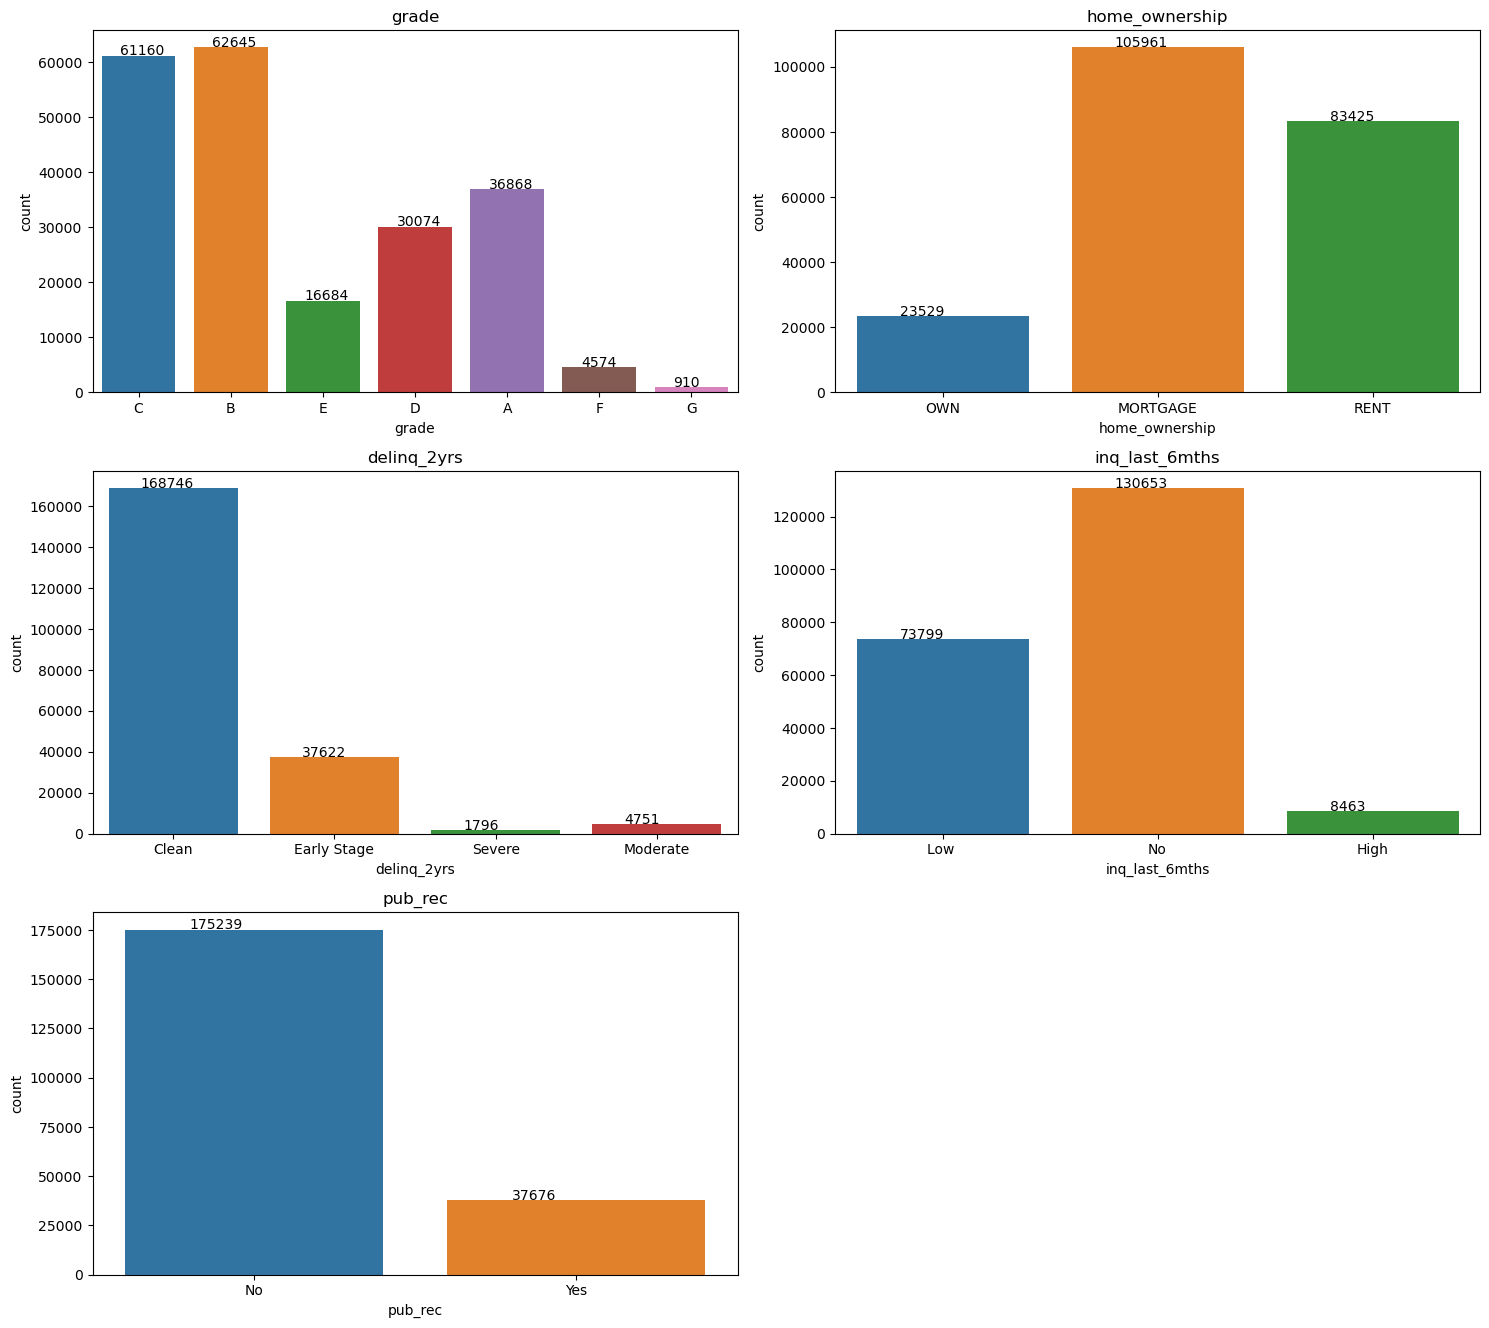

In [85]:
plot_cat_col = ['grade','home_ownership','delinq_2yrs','inq_last_6mths','pub_rec']

plt.figure(figsize=(15,35))
count = 1

for i in plot_cat_col:
    ax = plt.subplot(8,2,count)
    sns.countplot(x=i, data=loan)
    plt.title(i)
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+100))
        
    count += 1
        
plt.tight_layout()
plt.show()

**Inference:**
- `grade` : Here, almost 90% of the borrowers credit score is A, B, C and D which means maximum borrowers have good credit history.
- `home_ownership` : Here, almost 50% of the borrowers have taken loan by MORTGAGING their property to the lending institution (bank), 39% of the borrowers have RENTED properties and only 11% of the borrowers taking loan have their OWN properties which means maximum borrowers applying for loan can be assumed from middle class category.
- `delinq_2yrs` : Here, the best part is only 0.8% of the borrowers are at Severe risk level since they have done maximum late installment payment in past 2 years, which means most of the borrowers are regular payers.
- `inq_last_6mnths` : Here we can infer that only 4% of the borrowers are at High risk level for funding loan amount, since they have inquired about loan multiple times in past 6 months, which means they're the borrowers who are highly risky for lending loan by financial institutions.
- `pub_rec` : Here almost 18% of the borrowers have derogatory public records due to multiple reasons which means they can have a lasting impact on credit scores and can be highly risky for financial institutions.

#### 2. Univariate Analysis for Target Feature -

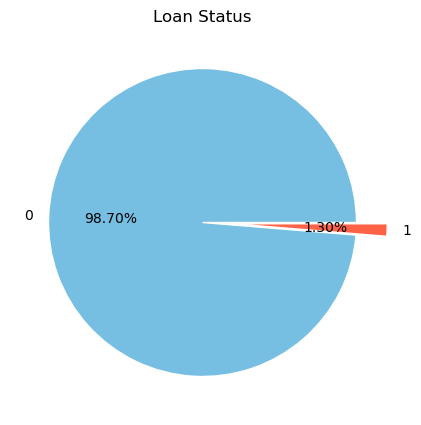

In [86]:
plt.figure(figsize=(5,5))
loan_status = loan['loan_status'].value_counts()
plt.pie(loan_status, autopct='%.2f%%', labels=loan_status.index, 
        colors=['#77BFE2','tomato'], wedgeprops={'edgecolor':'white'}, explode=[0,0.2])
plt.title('Loan Status')
plt.show()

**Inference:**
- Data is highly imbalanced since 99% of the data falls under 'Current' (Non-Defaulters) and only 1% of the data falls under 'Charged-Off' (Defaulters) sub-category.

**Actions:**
- Balancing the data during train-test-split data preprocessing.

#### 3. Univariate Analysis for Numeric Features -

In [87]:
loan_num = loan.select_dtypes(np.number)
loan_num.head()

,funded_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,0,12.29,667.06,65000.0,1,20.72,2000,25,31578,77.0,0.0,0.00,0.00,0.00,0.0,0.00,0,52303,41000
1,11000,0,12.69,369.00,40000.0,1,24.57,2002,13,5084,38.8,0.0,10043.49,9942.67,100.81,0.0,10059.00,332,175731,13100
2,7000,0,9.99,225.84,32000.0,1,32.41,2006,18,12070,74.0,0.0,221.96,167.56,54.40,0.0,225.84,0,202012,16300
3,10000,0,10.99,327.34,48000.0,1,30.98,1999,18,22950,66.0,0.0,315.13,235.76,79.37,0.0,327.34,0,108235,34750
4,9550,0,19.99,354.87,32376.0,1,32.54,1999,9,4172,29.6,0.0,333.66,195.78,137.88,0.0,354.87,0,45492,14100


In [88]:
loan_num.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt,212915.0,15258.578423,8611.159978,1000.00,8500.000,14000.00,20000.00,35000.00
term,212915.0,0.328516,0.469675,0.00,0.000,0.00,1.00,1.00
int_rate,212915.0,12.400531,4.248994,5.32,9.170,12.29,14.65,28.99
installment,212915.0,440.847182,245.831980,30.12,262.230,382.87,578.79,1445.46
annual_inc,212915.0,77792.383989,81878.119287,0.00,47000.000,65000.00,92500.00,9000000.00
loan_status,212915.0,0.013024,0.113377,0.00,0.000,0.00,0.00,1.00
dti,212915.0,19.361800,31.931633,0.00,12.660,18.72,25.52,9999.00
earliest_cr_line,212915.0,1998.344297,7.643759,1950.00,1994.000,2000.00,2004.00,2012.00
open_acc,212915.0,11.977414,5.662891,1.00,8.000,11.00,15.00,82.00
revol_bal,212915.0,17989.681671,24571.451730,0.00,6549.000,12063.00,21591.00,1630818.00


In [89]:
plot_num_col = ['funded_amnt','term','int_rate','installment','annual_inc','dti','earliest_cr_line','open_acc','revol_bal','revol_util',
                'out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

means = []
medians = []
modes = []
skewness = []
kurtosis = []

for i in plot_num_col:
    means.append(loan_num[i].mean())
    medians.append(loan_num[i].median())
    modes.append(loan_num[i].mode()[0])
    skewness.append(loan_num[i].skew())
    kurtosis.append(loan_num[i].kurt())
    
pd.DataFrame({'Mean' : means,
             'Median': medians,
             'Mode': modes,
             'Skewness':skewness,
             'Kurtosis':kurtosis}, index=plot_num_col)

,Mean,Median,Mode,Skewness,Kurtosis
funded_amnt,15258.578423,14000.00,10000.00,0.617480,-0.402565
term,0.328516,0.00,0.00,0.730231,-1.466776
int_rate,12.400531,12.29,9.17,0.572952,0.167218
installment,440.847182,382.87,318.79,0.920148,0.556999
annual_inc,77792.383989,65000.00,60000.00,50.374503,4473.474168
dti,19.361800,18.72,18.00,286.984433,89625.503154
earliest_cr_line,1998.344297,2000.00,2001.00,-1.045072,1.503243
open_acc,11.977414,11.00,9.00,1.269852,3.044119
revol_bal,17989.681671,12063.00,0.00,9.856943,240.530886
revol_util,53.343395,53.50,0.00,-0.055214,-0.754090


**Inference:**
- We can find the below details for all the numeric columns:
    - Mean value
    - Median value
    - Mode value
    - Skewness value
    - Kurtosis value

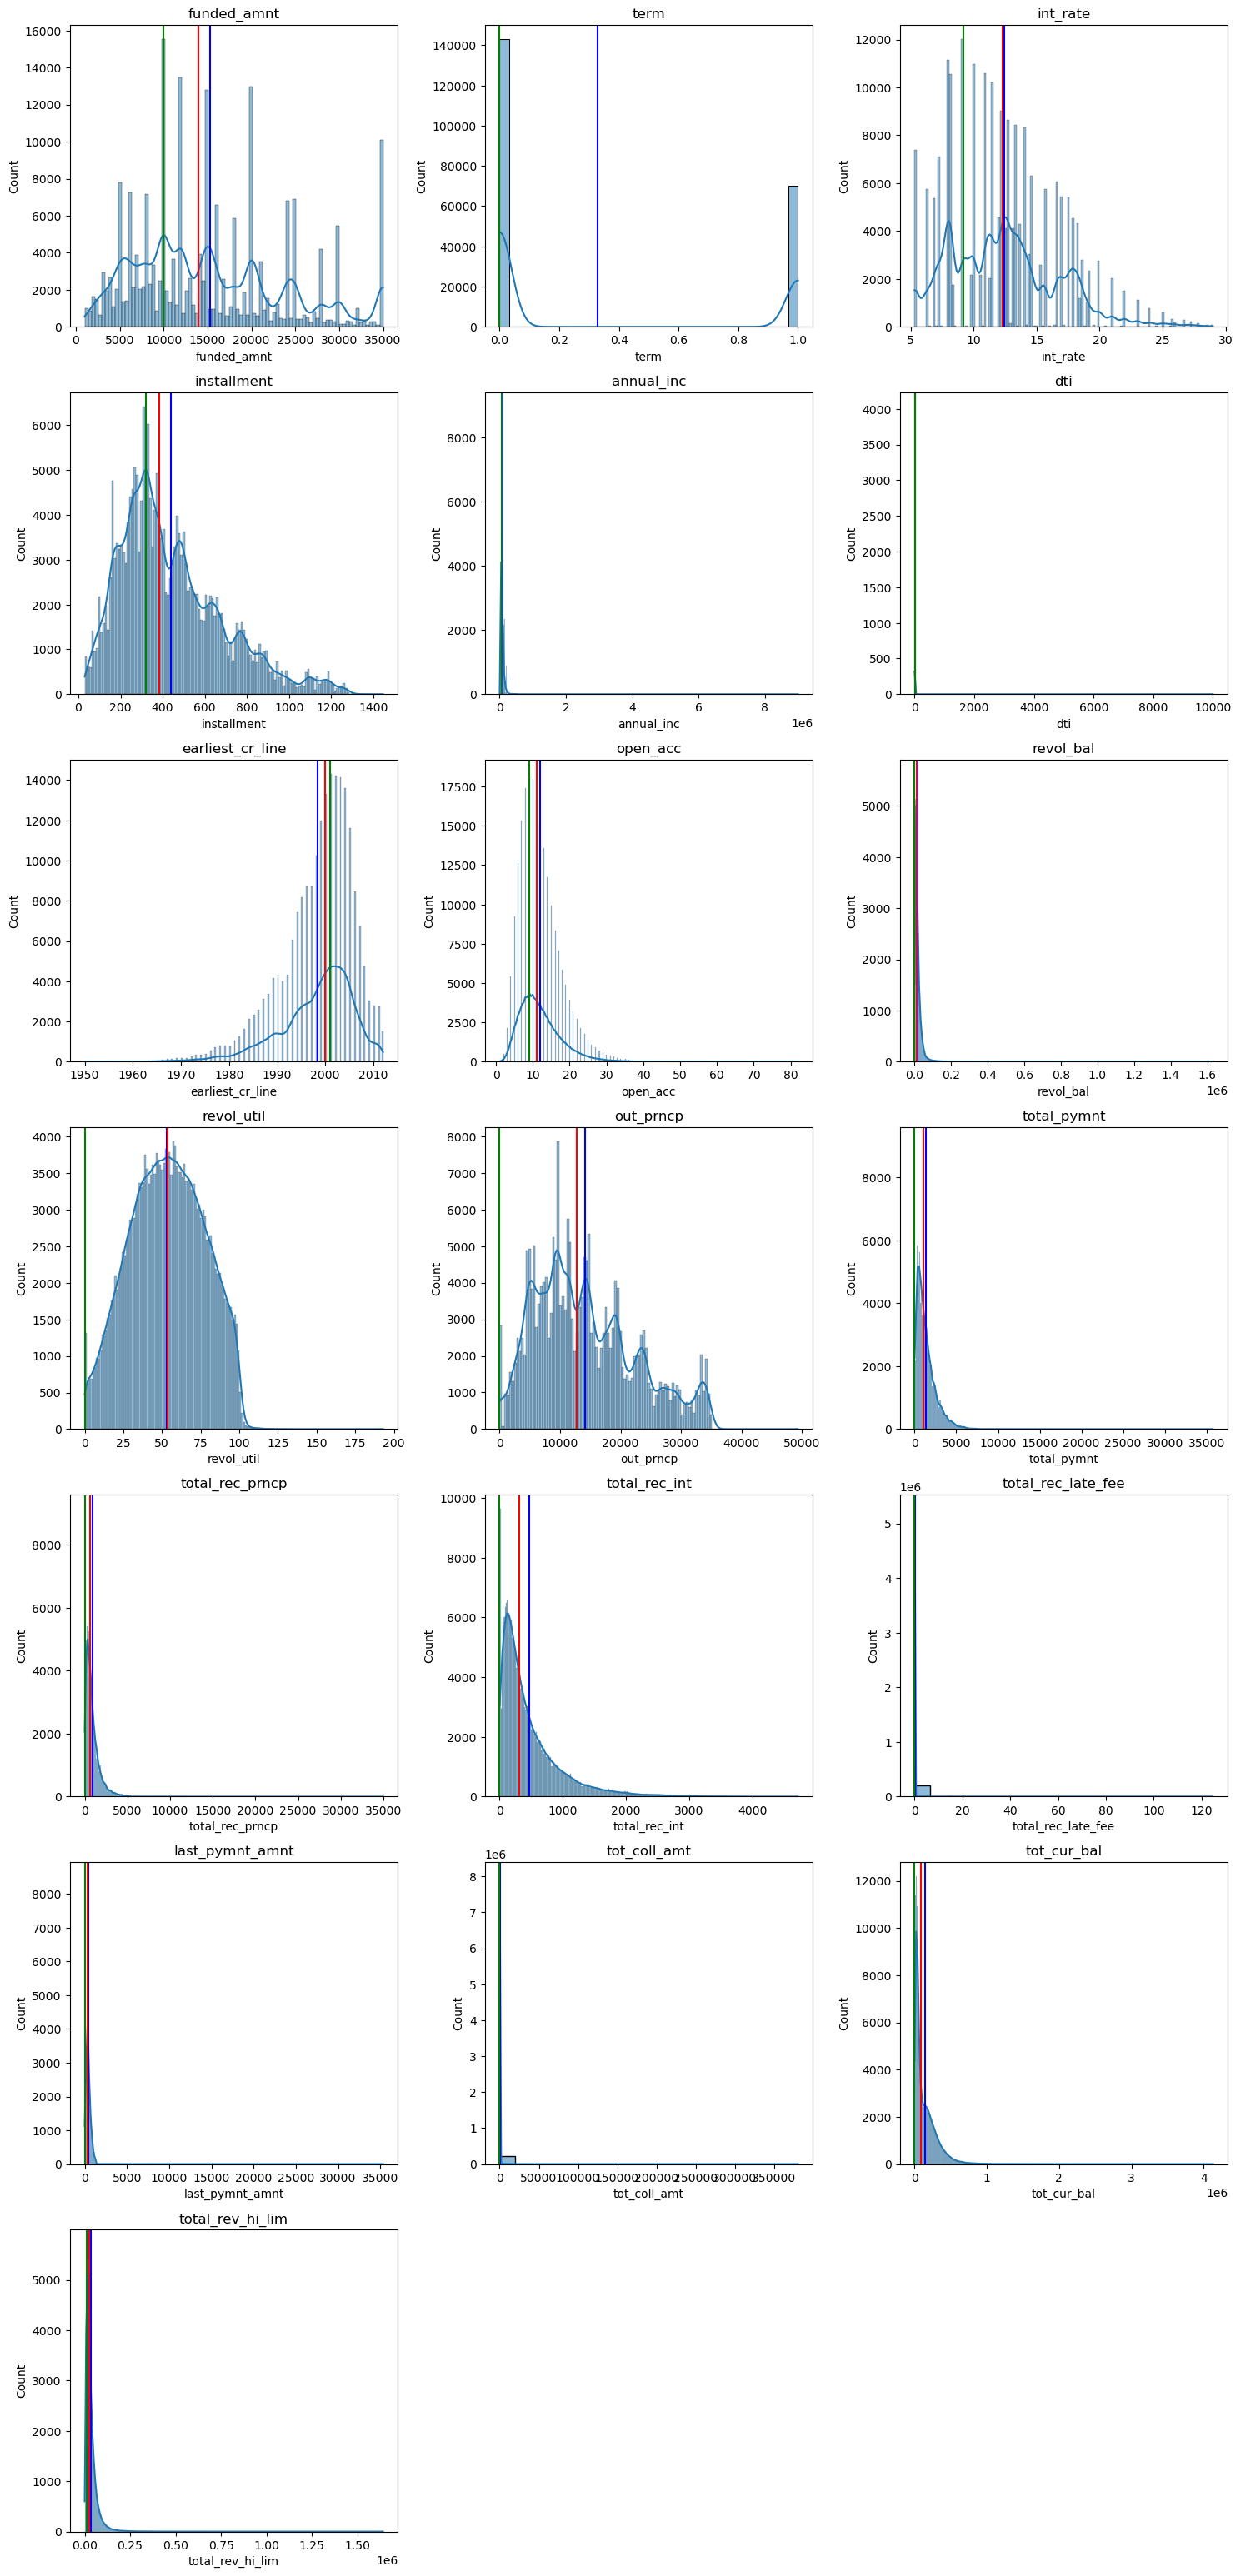

In [90]:
plot_num_col = ['funded_amnt','term','int_rate','installment','annual_inc','dti','earliest_cr_line','open_acc','revol_bal','revol_util',
                'out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

plt.figure(figsize=(15,35))
count = 1

for i in plot_num_col:
    ax = plt.subplot(8,3,count)
    sns.histplot(x=loan_num[i], kde=True)
    
    plt.axvline(loan_num[i].mean(), color='b')
    plt.axvline(loan_num[i].median(), color='r')
    plt.axvline(loan_num[i].mode()[0], color='g')
    
    plt.title(i)
    plt.xticks(rotation=0)
    
    count +=1
    
plt.tight_layout()   
plt.show()

### Bivariate Analysis:

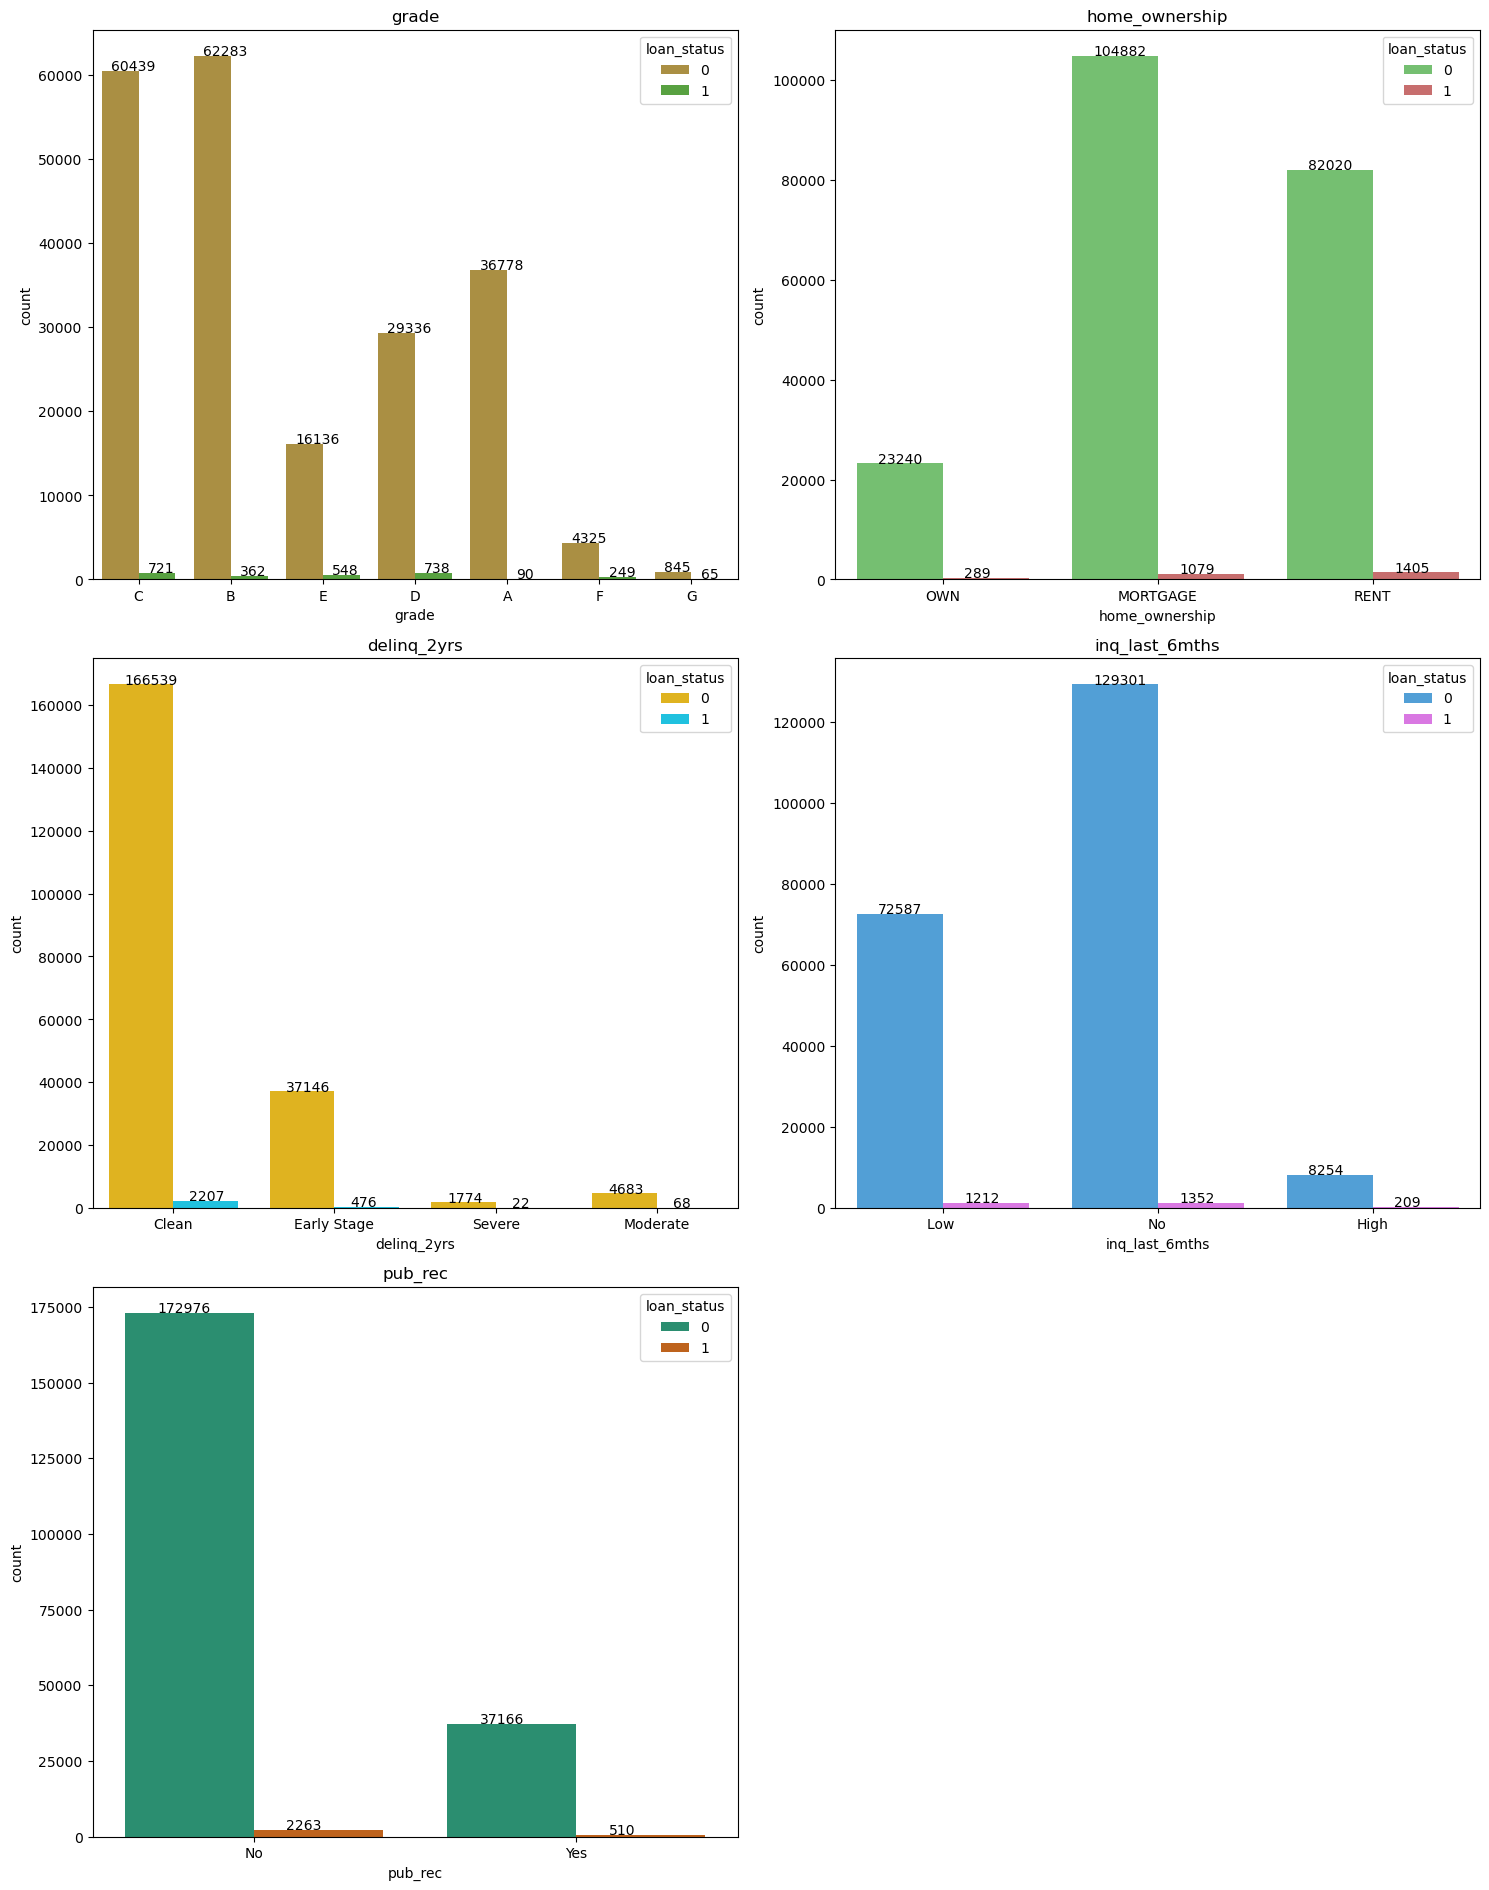

In [91]:
palette = {'grade': sns.color_palette('husl')[1:3], 
           'home_ownership': sns.color_palette('muted')[2:4], 
           'delinq_2yrs': sns.color_palette('bright')[8:], 
           'inq_last_6mths': sns.color_palette('husl')[4:6],  
           'pub_rec': sns.color_palette('Dark2')[0:2]}

plt.figure(figsize=(15,50))
count = 1

for i in plot_cat_col:
    ax = plt.subplot(8, 2, count)
    sns.countplot(x=loan[i],hue=loan['loan_status'],palette=palette[i])
    plt.title(i)
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.1, p.get_height() + 100))
    
    count += 1
    
plt.tight_layout()
plt.show()

### Multivariate Analysis:

1) Funded Amount based on Grade and Loan Status

In [92]:
loan.groupby(['grade','loan_status'])['funded_amnt'].sum()

grade  loan_status
A      0              545996925
       1                1167725
B      0              877046925
       1                4857150
C      0              902725100
       1                9455125
D      0              476008350
       1               10718425
E      0              302063050
       1                9240800
F      0               86527300
       1                5094275
G      0               16453700
       1                1425375
Name: funded_amnt, dtype: int64

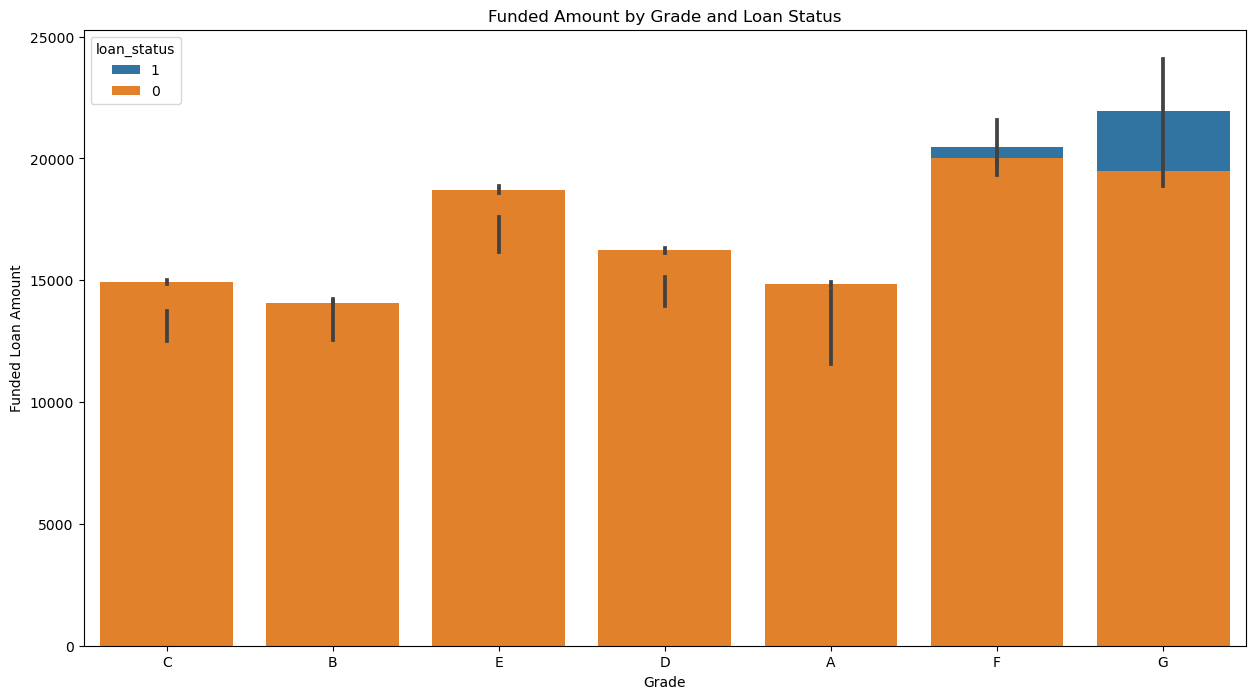

In [93]:
ax = sns.barplot(x=loan['grade'], y=loan['funded_amnt'], dodge=False, hue=loan['loan_status'], hue_order=[1,0])

ax.set_xlabel('Grade')
ax.set_ylabel('Funded Loan Amount')
ax.set_title('Funded Amount by Grade and Loan Status')
plt.show()

2) Funded Amount based on Home Ownership and Loan Status

In [94]:
loan.groupby(['home_ownership','loan_status'])['funded_amnt'].sum()

home_ownership  loan_status
MORTGAGE        0              1757499725
                1                18389400
OWN             0               348956500
                1                 4237425
RENT            0              1100365125
                1                19332050
Name: funded_amnt, dtype: int64

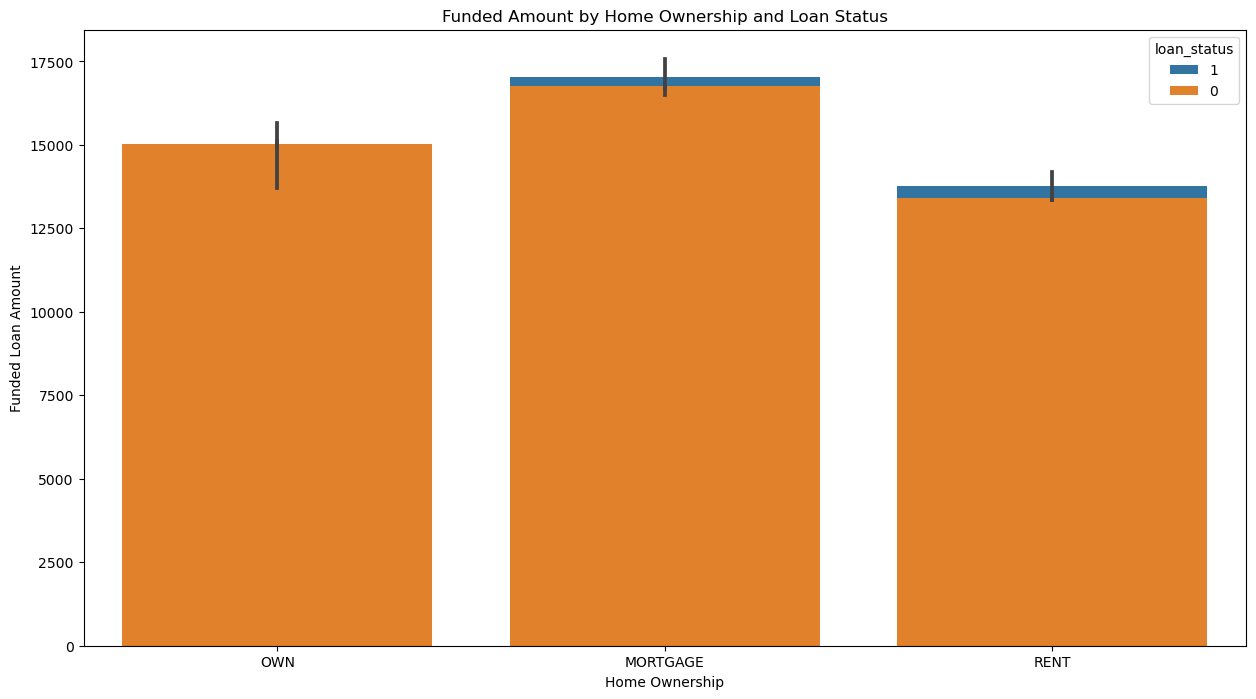

In [95]:
ax = sns.barplot(x=loan['home_ownership'], y=loan['funded_amnt'], dodge=False, hue=loan['loan_status'], hue_order=[1,0])

ax.set_xlabel('Home Ownership')
ax.set_ylabel('Funded Loan Amount')
ax.set_title('Funded Amount by Home Ownership and Loan Status')
plt.show()

3) Funded Amount based on No. of Public Records and Loan Status

In [96]:
loan.groupby(['pub_rec','loan_status'])['funded_amnt'].sum()

pub_rec  loan_status
No       0              2725693175
         1                34521650
Yes      0               481128175
         1                 7437225
Name: funded_amnt, dtype: int64

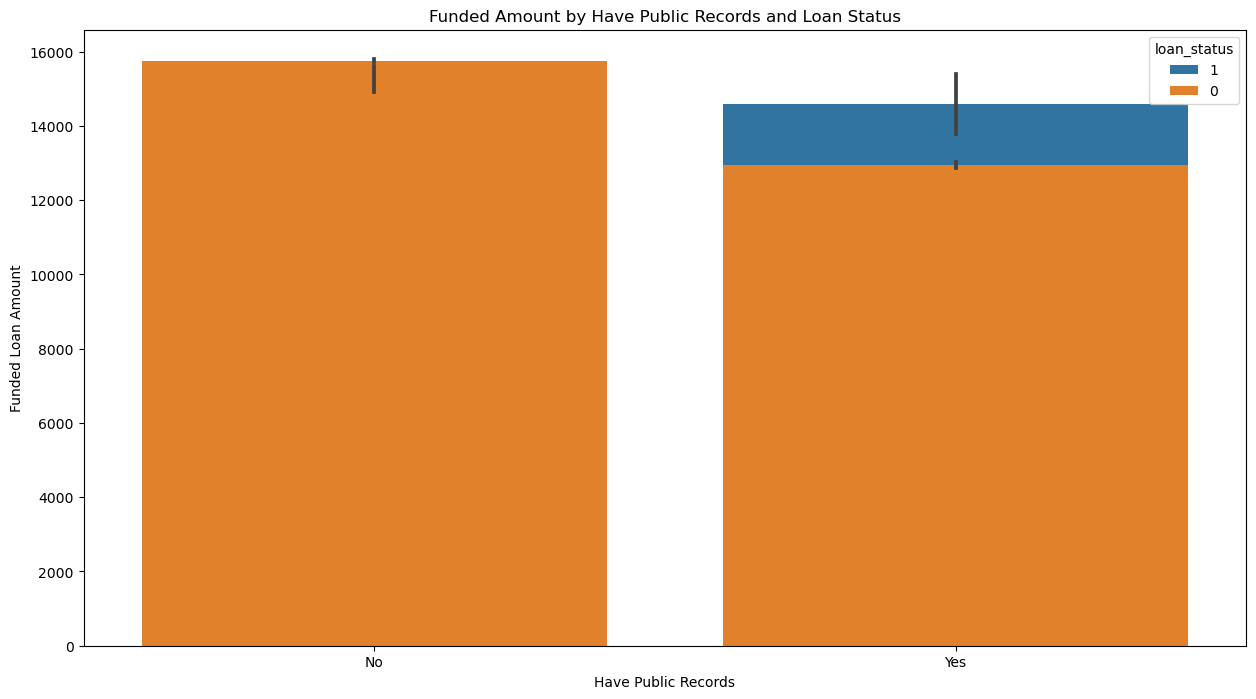

In [97]:
ax = sns.barplot(x=loan['pub_rec'], y=loan['funded_amnt'], dodge=False, hue=loan['loan_status'], hue_order=[1,0])

ax.set_xlabel('Have Public Records')
ax.set_ylabel('Funded Loan Amount')
ax.set_title('Funded Amount by Have Public Records and Loan Status')
plt.show()

4) Funded Amount based on Delinquencies (2 years) and Loan Status

In [98]:
loan.groupby(['delinq_2yrs','loan_status'])['funded_amnt'].sum()

delinq_2yrs  loan_status
Clean        0              2543766075
             1                33336050
Early Stage  0               570009450
             1                 7260700
Moderate     0                68492750
             1                 1080350
Severe       0                24553075
             1                  281775
Name: funded_amnt, dtype: int64

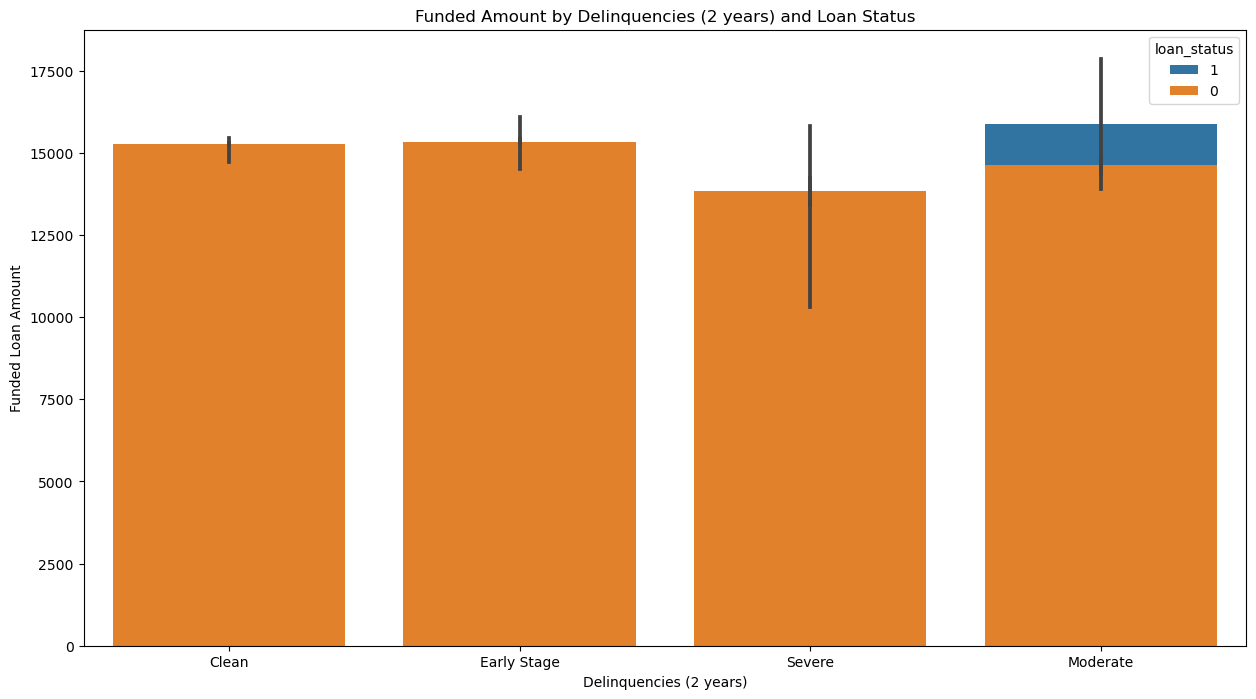

In [99]:
ax = sns.barplot(x=loan['delinq_2yrs'], y=loan['funded_amnt'], dodge=False, hue=loan['loan_status'], hue_order=[1,0])

ax.set_xlabel('Delinquencies (2 years)')
ax.set_ylabel('Funded Loan Amount')
ax.set_title('Funded Amount by Delinquencies (2 years) and Loan Status')
plt.show()

#### Independant Numerical Features Correlation

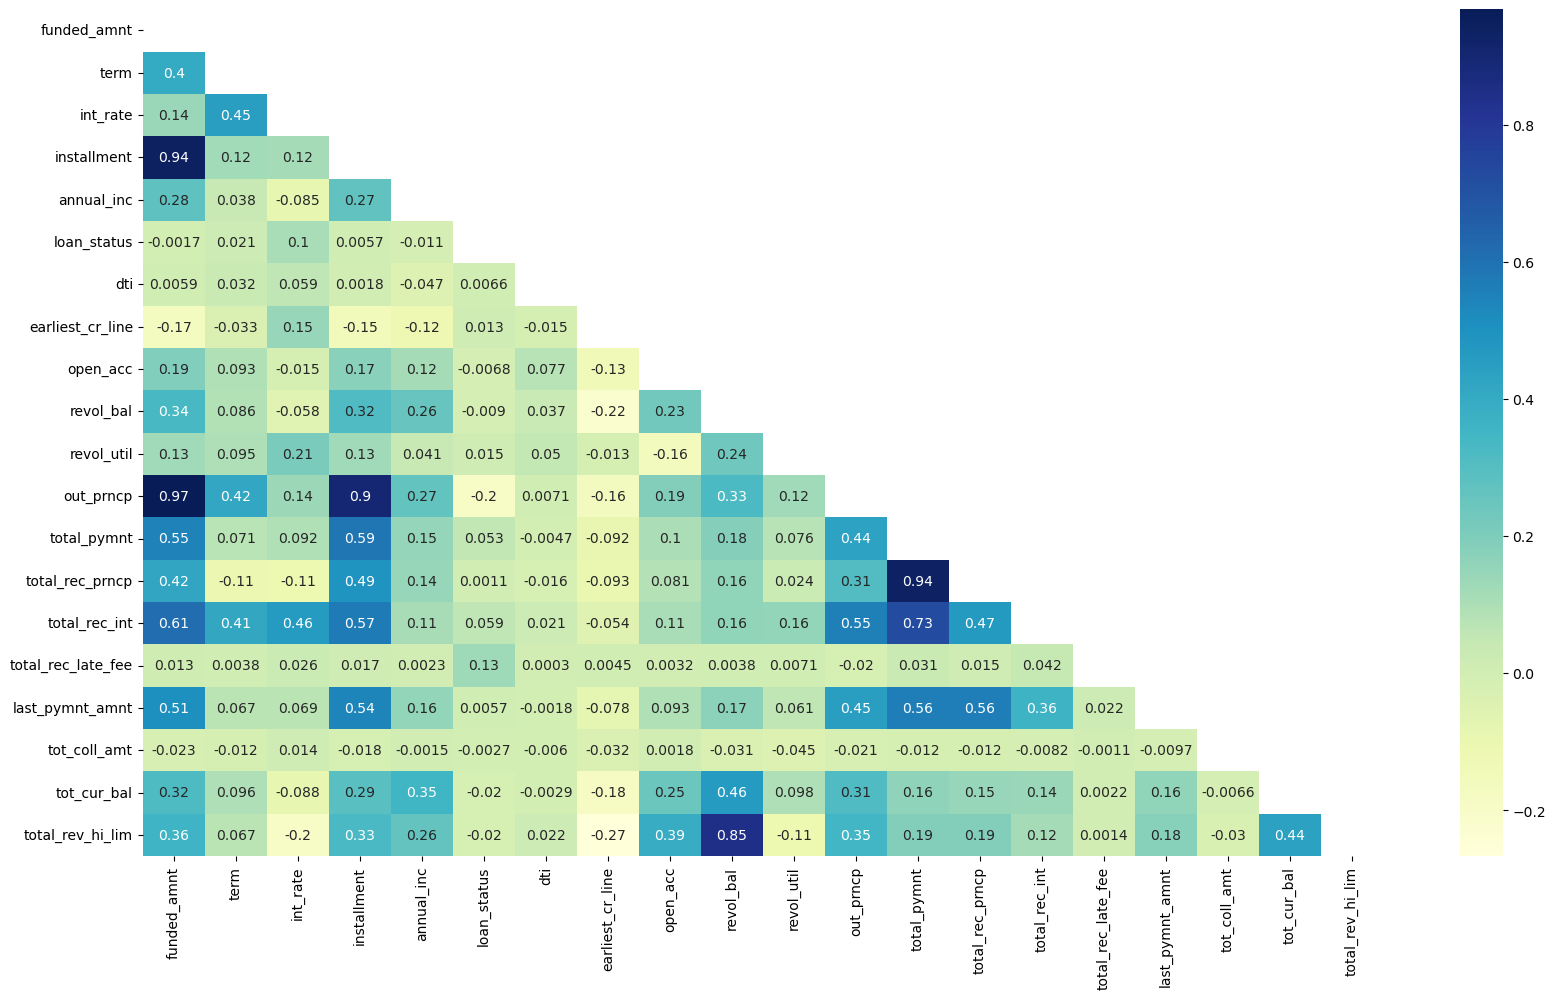

In [100]:
plt.figure(figsize=(20,11))

mask = np.triu(np.ones_like(loan.corr()))
sns.heatmap(loan.corr(), mask=mask, annot=True, cmap='YlGnBu')
plt.show()

### Data Preprocessing:

#### Split the data into train-test-split -
- Split the dataset into target and feature.
- Split the target and feature for training and testing (final validation) models.

In [101]:
loan.shape

(212915, 25)

In [102]:
loan.head()

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,0,12.29,667.06,C,OWN,65000.0,1,20.72,Clean,2000,Low,25,No,31578,77.0,0.0,0.00,0.00,0.00,0.0,0.00,0,52303,41000
1,11000,0,12.69,369.00,C,MORTGAGE,40000.0,1,24.57,Clean,2002,No,13,Yes,5084,38.8,0.0,10043.49,9942.67,100.81,0.0,10059.00,332,175731,13100
2,7000,0,9.99,225.84,B,MORTGAGE,32000.0,1,32.41,Clean,2006,Low,18,No,12070,74.0,0.0,221.96,167.56,54.40,0.0,225.84,0,202012,16300
3,10000,0,10.99,327.34,B,MORTGAGE,48000.0,1,30.98,Clean,1999,Low,18,No,22950,66.0,0.0,315.13,235.76,79.37,0.0,327.34,0,108235,34750
4,9550,0,19.99,354.87,E,RENT,32376.0,1,32.54,Clean,1999,High,9,No,4172,29.6,0.0,333.66,195.78,137.88,0.0,354.87,0,45492,14100


In [103]:



y = loan['loan_status']       # target
X = loan.drop('loan_status', axis=1)







# Display target and feature
print('Target: ')
display(y.head())
print('\nFeatures: ')
display(X.head())

Target: 


0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64


Features: 


,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,0,12.29,667.06,C,OWN,65000.0,20.72,Clean,2000,Low,25,No,31578,77.0,0.0,0.00,0.00,0.00,0.0,0.00,0,52303,41000
1,11000,0,12.69,369.00,C,MORTGAGE,40000.0,24.57,Clean,2002,No,13,Yes,5084,38.8,0.0,10043.49,9942.67,100.81,0.0,10059.00,332,175731,13100
2,7000,0,9.99,225.84,B,MORTGAGE,32000.0,32.41,Clean,2006,Low,18,No,12070,74.0,0.0,221.96,167.56,54.40,0.0,225.84,0,202012,16300
3,10000,0,10.99,327.34,B,MORTGAGE,48000.0,30.98,Clean,1999,Low,18,No,22950,66.0,0.0,315.13,235.76,79.37,0.0,327.34,0,108235,34750
4,9550,0,19.99,354.87,E,RENT,32376.0,32.54,Clean,1999,High,9,No,4172,29.6,0.0,333.66,195.78,137.88,0.0,354.87,0,45492,14100


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print(f'Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}',
      f'\n\nShape of X_test: {X_test.shape}\nShape of y_test: {y_test.shape}')

Shape of X_train: (149040, 24)
Shape of y_train: (149040,) 

Shape of X_test: (63875, 24)
Shape of y_test: (63875,)


#### Addressing imbalanced class distribution:
- Check for imbalance in the target class distribution in the training data.
- Our target class distribution is imbalanced, but we can split it into equal proportion using `stratify` parameter during train-test-split.
- Even if the classes are imbalanced, it helps prevent the model from being biased towards the majority class and ensures that the performance evaluation is more representative across different classes.
- Using this technique we can avoid balancing our data unnecessarily- because balancing Defaulters with Non-Defaulters can be irrelevant based on our domain understanding.

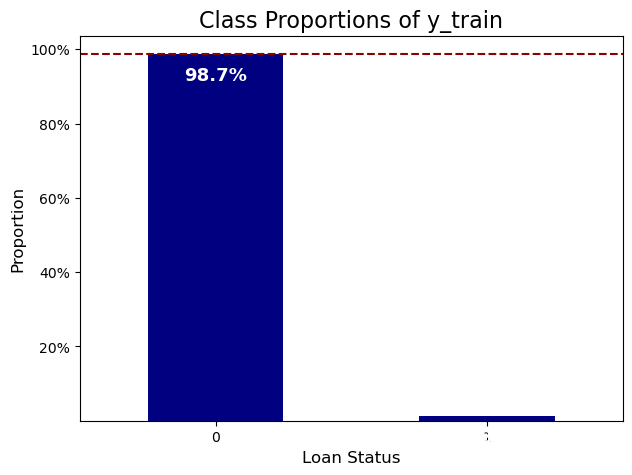

In [105]:
fig,ax = plt.subplots(figsize = (7,5))

plot_dataseries = round(y_train.value_counts(normalize = True)*100,2) 

plot_dataseries.plot(kind='bar', ax=ax, color='navy')
plt.axhline(y=plot_dataseries[0], color='darkred', linestyle='--')
plt.title('Class Proportions of y_train', fontsize = 16)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.xticks(ticks=range(len(plot_dataseries)), labels=[0,1], rotation='horizontal')
plt.yticks(ticks=[20,40,60,80,100], labels=['20%','40%','60%','80%','100%'])

data_label = plot_dataseries.astype(str).str.cat(np.full((2,),'%'), sep='')

for x,y in enumerate(plot_dataseries):
    plt.text(x,y-7,data_label[x],color='white',
             fontweight=700,fontsize=13, horizontalalignment='center')

plt.show()

In [106]:
y_train.value_counts()

0    147099
1      1941
Name: loan_status, dtype: int64

In [107]:
y_test.value_counts()

0    63043
1      832
Name: loan_status, dtype: int64

**Inference:**
- Training data is good to go.

#### Encoding Categorical and Scaling Numerical data for Train Data:

In [108]:
X_train.head()

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
105036,7125,0,20.99,268.40,E,RENT,21000.0,17.89,Clean,2005,No,6,No,8606,92.5,6686.10,784.43,438.90,345.53,0.0,268.40,0,8606,9300
126484,1500,0,17.57,53.91,D,RENT,93000.0,23.97,Clean,2003,Low,20,No,5841,61.5,1402.75,160.27,97.25,63.02,0.0,53.91,0,261176,9500
183761,7000,0,10.99,229.14,B,RENT,65000.0,15.62,Moderate,2005,Low,15,No,8838,58.3,6159.59,1141.43,840.41,301.02,0.0,229.14,0,42195,15400
79302,16000,1,12.69,361.52,C,MORTGAGE,62000.0,19.59,Clean,2004,No,11,Yes,12503,59.5,15613.33,711.76,386.67,325.09,0.0,361.52,0,195061,21000
157882,11200,1,12.69,253.07,C,RENT,61000.0,15.19,Clean,2003,No,10,No,10747,85.3,10652.88,1055.70,547.12,508.58,0.0,253.07,0,49265,12600


In [109]:
loan_cat1 = pd.get_dummies(X_train[['home_ownership','inq_last_6mths','pub_rec']], drop_first=True).reset_index()
loan_cat1.head()

,index,home_ownership_OWN,home_ownership_RENT,inq_last_6mths_Low,inq_last_6mths_No,pub_rec_Yes
0,105036,0,1,0,1,0
1,126484,0,1,1,0,0
2,183761,0,1,1,0,0
3,79302,0,0,0,1,1
4,157882,0,1,0,1,0


In [110]:
oe = OrdinalEncoder(categories=[['A','B','C','D','E','F','G']])
fitted = oe.fit_transform(X_train[['grade']])
grade = pd.DataFrame(fitted, columns=['grade'])

In [111]:
oe = OrdinalEncoder(categories=[['Clean','Early Stage','Moderate','Severe']])
fitted = oe.fit_transform(X_train[['delinq_2yrs']])
delinq_2yrs = pd.DataFrame(fitted, columns=['delinq_2yrs'])

In [112]:
scaled_col = X_train.drop(columns=['home_ownership','inq_last_6mths','pub_rec','grade','delinq_2yrs','term'])

In [113]:
rs = RobustScaler()

rs_scaled_col = rs.fit_transform(scaled_col)

In [114]:
rs_scaled_col = pd.DataFrame(rs_scaled_col, columns=['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'])

In [115]:
rs_scaled_col.head(3)

,funded_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.597826,1.587591,-0.360322,-0.972376,-0.062937,0.5,-0.714286,-0.229704,1.083333,-0.514333,-0.181119,-0.259777,0.070649,0.0,-0.333281,0.0,-0.408132,-0.564286
1,-1.086957,0.963504,-1.037374,0.618785,0.409479,0.3,1.285714,-0.413853,0.222222,-0.960509,-0.640754,-0.666808,-0.506032,0.0,-1.001183,0.0,1.007098,-0.557143
2,-0.608696,-0.237226,-0.484249,0.000000,-0.239316,0.5,0.571429,-0.214252,0.133333,-0.558796,0.081778,0.218568,-0.020209,0.0,-0.455533,0.0,-0.219922,-0.346429


In [116]:
term = pd.DataFrame(X_train['term'])

In [117]:
df1 = rs_scaled_col.reset_index(drop=True)
df2 = loan_cat1.reset_index(drop=True) 
df3 = term.reset_index(drop=True)
df4 = grade.reset_index(drop=True) 
df5 = delinq_2yrs.reset_index(drop=True)

In [118]:
X_train_final = pd.concat([df1, df2, df3, df4, df5], axis=1)

In [119]:
X_train_final.head(3)

,funded_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,index,home_ownership_OWN,home_ownership_RENT,inq_last_6mths_Low,inq_last_6mths_No,pub_rec_Yes,term,grade,delinq_2yrs
0,-0.597826,1.587591,-0.360322,-0.972376,-0.062937,0.5,-0.714286,-0.229704,1.083333,-0.514333,-0.181119,-0.259777,0.070649,0.0,-0.333281,0.0,-0.408132,-0.564286,105036,0,1,0,1,0,0,4.0,0.0
1,-1.086957,0.963504,-1.037374,0.618785,0.409479,0.3,1.285714,-0.413853,0.222222,-0.960509,-0.640754,-0.666808,-0.506032,0.0,-1.001183,0.0,1.007098,-0.557143,126484,0,1,1,0,0,0,3.0,0.0
2,-0.608696,-0.237226,-0.484249,0.000000,-0.239316,0.5,0.571429,-0.214252,0.133333,-0.558796,0.081778,0.218568,-0.020209,0.0,-0.455533,0.0,-0.219922,-0.346429,183761,0,1,1,0,0,0,1.0,2.0


In [120]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149040 entries, 0 to 149039
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amnt          149040 non-null  float64
 1   int_rate             149040 non-null  float64
 2   installment          149040 non-null  float64
 3   annual_inc           149040 non-null  float64
 4   dti                  149040 non-null  float64
 5   earliest_cr_line     149040 non-null  float64
 6   open_acc             149040 non-null  float64
 7   revol_bal            149040 non-null  float64
 8   revol_util           149040 non-null  float64
 9   out_prncp            149040 non-null  float64
 10  total_pymnt          149040 non-null  float64
 11  total_rec_prncp      149040 non-null  float64
 12  total_rec_int        149040 non-null  float64
 13  total_rec_late_fee   149040 non-null  float64
 14  last_pymnt_amnt      149040 non-null  float64
 15  tot_coll_amt     

#### Encoding Categorical and Scaling Numerical data for Test Data:

In [121]:
X_test.head()  


,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
175620,10000,0,7.89,312.86,A,RENT,150000.0,27.03,Clean,1999,No,17,No,31167,54.2,8748.10,1555.53,1251.90,303.63,0.0,312.86,0,244123,54600
104224,35000,0,13.33,1184.86,C,RENT,95000.0,14.34,Early Stage,2002,Low,11,No,22362,65.2,33399.03,2460.43,1600.97,859.46,0.0,1184.86,0,49283,34300
164824,12000,0,9.99,387.15,B,RENT,52000.0,16.39,Clean,2002,No,10,No,8561,51.9,10836.58,1548.27,1163.42,384.85,0.0,387.15,0,30461,16500
180981,8575,0,15.61,299.83,D,RENT,85000.0,12.34,Early Stage,2007,No,9,No,4735,57.0,7608.77,1491.71,966.23,525.48,0.0,299.83,0,31205,8300
118842,24000,1,13.99,558.32,C,RENT,92000.0,30.85,Clean,1998,Low,10,No,29984,44.6,23154.66,1637.65,845.34,792.31,0.0,558.32,0,98377,67300


In [122]:
loan_cat2 = pd.get_dummies(X_test[['home_ownership','inq_last_6mths','pub_rec']], drop_first=True).reset_index()
loan_cat2.head()

,index,home_ownership_OWN,home_ownership_RENT,inq_last_6mths_Low,inq_last_6mths_No,pub_rec_Yes
0,175620,0,1,0,1,0
1,104224,0,1,1,0,0
2,164824,0,1,0,1,0
3,180981,0,1,0,1,0
4,118842,0,1,1,0,0


In [123]:
oe = OrdinalEncoder(categories=[['A','B','C','D','E','F','G']])
fitted = oe.fit_transform(X_test[['grade']])
grade1 = pd.DataFrame(fitted, columns=['grade'])

In [124]:
oe = OrdinalEncoder(categories=[['Clean','Early Stage','Moderate','Severe']])
fitted = oe.fit_transform(X_test[['delinq_2yrs']])
delinq_2yrs1 = pd.DataFrame(fitted, columns=['delinq_2yrs'])

In [125]:
scaled_col1 = X_test.drop(columns=['home_ownership','inq_last_6mths','pub_rec','grade','delinq_2yrs','term'])

In [126]:
rs_scaled_col1 = rs.fit_transform(scaled_col1)

In [127]:
rs_scaled_col1 = pd.DataFrame(rs_scaled_col1, columns=['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'])

In [128]:
rs_scaled_col1.head(10)

,funded_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.347826,-0.802920,-0.226304,1.847826,0.642802,-0.1,0.857143,1.265041,0.016393,-0.351073,0.393526,0.714486,-0.014832,0.0,-0.194936,0.0,0.915775,1.049822
1,1.826087,0.189781,2.520975,0.652174,-0.344747,0.2,0.000000,0.681619,0.316940,1.735728,1.068434,1.133156,1.130205,0.0,2.501082,0.0,-0.179450,0.327402
2,-0.173913,-0.419708,0.007750,-0.282609,-0.185214,0.2,-0.142857,-0.232839,-0.046448,-0.174275,0.388111,0.608365,0.152485,0.0,0.034751,0.0,-0.285251,-0.306050
3,-0.471739,0.605839,-0.267356,0.434783,-0.500389,0.7,-0.285714,-0.486350,0.092896,-0.447522,0.345927,0.371858,0.442190,0.0,-0.235221,0.0,-0.281069,-0.597865
4,0.869565,0.310219,0.547030,0.586957,0.940078,-0.2,-0.142857,1.186655,-0.245902,0.868501,0.454774,0.226864,0.991873,0.0,0.563969,0.0,0.096515,1.501779
5,-0.243478,0.399635,0.002268,-0.652174,0.508949,0.3,-0.142857,-0.001590,1.303279,-0.164695,-0.485913,-0.486867,-0.380471,0.0,0.029372,0.0,-0.353475,-0.469751
6,0.147826,2.135036,0.210709,-0.195652,1.006226,-0.5,1.428571,-0.539292,-0.551913,0.163902,1.268617,0.254774,3.191822,0.0,0.233923,0.0,0.151147,-0.473310
7,1.565217,-0.419708,2.040642,1.195652,-0.087160,-1.1,0.000000,0.373642,0.311475,1.354658,2.300117,2.934034,1.439028,0.0,2.029712,0.0,1.346485,0.081851
8,-0.243478,0.072993,-0.414675,-0.173913,1.066926,0.7,-0.142857,-0.312218,-0.191257,-0.166424,-0.400925,-0.462375,-0.187794,0.0,-0.379792,0.0,0.367595,-0.330961
9,1.826087,0.857664,2.718892,1.195652,0.633463,0.4,1.857143,-0.576928,-1.106557,1.543755,3.861543,3.853039,4.173312,0.0,2.695307,0.0,0.129877,0.060498


In [129]:
term1 = pd.DataFrame(X_test['term'])

In [130]:
df1 = rs_scaled_col1.reset_index(drop=True)
df2 = loan_cat2.reset_index(drop=True) 
df3 = term1.reset_index(drop=True)
df4 = grade1.reset_index(drop=True) 
df5 = delinq_2yrs1.reset_index(drop=True)

In [131]:
X_test_final = pd.concat([df1, df2, df3, df4, df5], axis=1)

In [132]:
X_test_final.head(3)

,funded_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,index,home_ownership_OWN,home_ownership_RENT,inq_last_6mths_Low,inq_last_6mths_No,pub_rec_Yes,term,grade,delinq_2yrs
0,-0.347826,-0.802920,-0.226304,1.847826,0.642802,-0.1,0.857143,1.265041,0.016393,-0.351073,0.393526,0.714486,-0.014832,0.0,-0.194936,0.0,0.915775,1.049822,175620,0,1,0,1,0,0,0.0,0.0
1,1.826087,0.189781,2.520975,0.652174,-0.344747,0.2,0.000000,0.681619,0.316940,1.735728,1.068434,1.133156,1.130205,0.0,2.501082,0.0,-0.179450,0.327402,104224,0,1,1,0,0,0,2.0,1.0
2,-0.173913,-0.419708,0.007750,-0.282609,-0.185214,0.2,-0.142857,-0.232839,-0.046448,-0.174275,0.388111,0.608365,0.152485,0.0,0.034751,0.0,-0.285251,-0.306050,164824,0,1,0,1,0,0,1.0,0.0


In [133]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63875 entries, 0 to 63874
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          63875 non-null  float64
 1   int_rate             63875 non-null  float64
 2   installment          63875 non-null  float64
 3   annual_inc           63875 non-null  float64
 4   dti                  63875 non-null  float64
 5   earliest_cr_line     63875 non-null  float64
 6   open_acc             63875 non-null  float64
 7   revol_bal            63875 non-null  float64
 8   revol_util           63875 non-null  float64
 9   out_prncp            63875 non-null  float64
 10  total_pymnt          63875 non-null  float64
 11  total_rec_prncp      63875 non-null  float64
 12  total_rec_int        63875 non-null  float64
 13  total_rec_late_fee   63875 non-null  float64
 14  last_pymnt_amnt      63875 non-null  float64
 15  tot_coll_amt         63875 non-null 

In [134]:
X_train_final.drop('index', axis=1, inplace=True)
X_test_final.drop('index', axis=1, inplace=True)

#### Define a generelized function to calculate metric value of train-test data:

In [135]:
# train data

def train_report(model):
    X_train_pred = model.predict(X_train_final)
    return (classification_report(y_train, X_train_pred))

In [136]:
# test data

def test_report(model):
    X_test_pred = model.predict(X_test_final)
    return (classification_report(y_test, X_test_pred))

#### Define a generalized function to get confusion matrix, auc-roc curve and train-test classification report for all models:

In [137]:
def plot_metric(clf, X_test, y_test, model_name):
    plt.rcParams['figure.figsize']=[6,4]
    print('\nMetric of the model: ', model_name)
    print('\nTrain Report: ')
    train_report = train_report(clf)
    print(train_report)
    
    print('')
    
    print('\nTest Report: ')
    test_report = test_report(clf)
    print(test_report)
    
    print('\nConfusion Matrix: ')
    plot_confusion_matrix(clf, X_test, y_test, display_labels=[0,1])
    plt.show()
    
    print('\nROC Curve: ')
    plot_roc_curve(clf, X_test, y_test)
    plt.show()
    
    print('---------------------------------------------------------')

#  Model Building 

In [138]:
X_train_final1 = X_train_final.copy()
X_test_final1 = X_test_final.copy()

In [139]:
X_train_final1 = sm.add_constant(X_train_final1)
X_test_final1 = sm.add_constant(X_test_final1)

In [140]:
y_train.head()

105036    0
126484    0
183761    0
79302     0
157882    0
Name: loan_status, dtype: int64

In [141]:
y_train = y_train.reset_index()
y_train.drop('index', axis=1, inplace=True)

In [142]:
y_test = y_test.reset_index()
y_test.drop('index', axis=1, inplace=True)

**1.Define train and test sets**

In [143]:
print("The shape of X_train is:",X_train_final.shape)
print("The shape of X_test is:",X_test_final.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (149040, 26)
The shape of X_test is: (63875, 26)
The shape of y_train is: (149040, 1)
The shape of y_test is: (63875, 1)


In [144]:
x_train=X_train_final
x_test=X_test_final

**2. Build model using sm.Logit().fit()**

In [146]:
model = sm.Logit(y_train, x_train).fit(method='bfgs')
model.summary()

         Current function value: 0.023487
         Iterations: 35
         Function evaluations: 56
         Gradient evaluations: 45


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               149040
Model:                          Logit   Df Residuals:                   149014
Method:                           MLE   Df Model:                           25
Date:                Tue, 20 Jun 2023   Pseudo R-squ.:                  0.6619
Time:                        22:57:15   Log-Likelihood:                -3500.6
converged:                      False   LL-Null:                       -10354.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
funded_amnt             1.2337      0.473      2.609      0.009       0.307       2.161
int_rate                5.4871      0.138     39.791      0.000       5.217       5.757
installment             0.5878      0.428      1.372      0.170      -0.252       1.428
annual_inc             -0.0110      0.014     -0.794      0.427      -0.038       0.016
dti                    -0.1808      0.054     -3.375      0.001      -0.286      -0.076
earliest_cr_line       -0.1279      0.048     -2.647      0.008      -0.223      -0.033
open_acc                0.3819      0.048      7.997      0.000       0.288       0.475
revol_bal               0.4182      0.062      6.732      0.000       0.296       0.540
revol_util              0.4221      0.066      6.362      0.000       0.292       0.552
out_prncp              -6.6664      0.123    -54.360      0.000      -6.907      -6.426
total_pymnt             1.3088      0.176      7.419      0.000       0.963       1.655
total_rec_prncp        -1.2819      0.122    -10.531      0.000      -1.520      -1.043
total_rec_int           0.8533      0.088      9.653      0.000       0.680       1.027
total_rec_late_fee      0.2824      0.011     26.683      0.000       0.262       0.303
last_pymnt_amnt        -0.1813      0.122     -1.487      0.137      -0.420       0.058
tot_coll_amt         2.647e-05   4.93e-06      5.368      0.000    1.68e-05    3.61e-05
tot_cur_bal            -0.9841      0.071    -13.784      0.000      -1.124      -0.844
total_rev_hi_lim       -0.1897      0.104     -1.826      0.068      -0.393       0.014
home_ownership_OWN     -0.9844      0.120     -8.221      0.000      -1.219      -0.750
home_ownership_RENT    -1.5952      0.087    -18.366      0.000      -1.765      -1.425
inq_last_6mths_Low     -2.7707      0.087    -31.724      0.000      -2.942      -2.600
inq_last_6mths_No      -3.8130      0.106    -35.958      0.000      -4.021      -3.605
pub_rec_Yes            -0.9685      0.094    -10.305      0.000      -1.153      -0.784
term                   -0.5214      0.203     -2.573      0.010      -0.919      -0.124
grade                  -2.5064      0.081    -30.847      0.000      -2.666      -2.347
delinq_2yrs            -0.7574      0.076     -9.940      0.000      -0.907      -0.608
=======================================================================================

Possibly complete quasi-separation: A fraction 0.48 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**3. Feature Selection by Recursive Backward Elimination**

In [147]:
#Feature Selection by Recursive Backward Elimination
cols = list(x_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = x_train[cols]
    Xc = sm.add_constant(X)
    model = sm.Logit(y_train,Xc).fit(method='bfgs')
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

         Current function value: 0.015821
         Iterations: 35
         Function evaluations: 59
         Gradient evaluations: 49
         Current function value: 0.015872
         Iterations: 35
         Function evaluations: 60
         Gradient evaluations: 50
         Current function value: 0.013956
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.014045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.012711
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.015599
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
['funded_amnt', 'int_rate', 'installment', 'earliest_cr_line', 'open_acc', 'revol_util', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 't

 **3.1. Selected Features by Recursive Backward Elimination**

In [148]:
print(selected_features)

x_train=x_train[selected_features]
x_test=x_test[selected_features]

['funded_amnt', 'int_rate', 'installment', 'earliest_cr_line', 'open_acc', 'revol_util', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'home_ownership_OWN', 'home_ownership_RENT', 'inq_last_6mths_Low ', 'inq_last_6mths_No', 'pub_rec_Yes', 'grade', 'delinq_2yrs']


**4.Fit and evaluate all the model and choose the best to deploy**

In [149]:
clfs = {
    'LogisticRegression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN':KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier(),
    'SVM':SVC()
}

# create an empty dataframe of metrics
models_report = pd.DataFrame(columns=['Model_name','Accuracy','Recall','Precision',
                                    'f1_score'])

# fit and evaluate each model
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    print('Fitting Classifier....', clf_name)
    y_pred=clf.predict(x_test)
    t=pd.Series({
        'Model_name':clf_name,
        'Accuracy':accuracy_score(y_test, y_pred),
        'Recall':recall_score(y_test, y_pred),
        'Precision':precision_score(y_test, y_pred),
        'f1_score':f1_score(y_test, y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report

Fitting Classifier.... LogisticRegression
Fitting Classifier.... Naive Bayes
Fitting Classifier.... KNN
Fitting Classifier.... DecisionTreeClassifier
Fitting Classifier.... RandomForestClassifier
Fitting Classifier.... AdaBoostClassifier
Fitting Classifier.... GradientBoostingClassifier
Fitting Classifier.... XGBClassifier
Fitting Classifier.... SVM


,Model_name,Accuracy,Recall,Precision,f1_score
7,XGBClassifier,0.999953,1.000000,0.996407,0.998200
3,DecisionTreeClassifier,0.999937,1.000000,0.995215,0.997602
4,RandomForestClassifier,0.999937,1.000000,0.995215,0.997602
5,AdaBoostClassifier,0.999937,1.000000,0.995215,0.997602
6,GradientBoostingClassifier,0.999937,1.000000,0.995215,0.997602
0,LogisticRegression,0.999499,0.961538,1.000000,0.980392
8,SVM,0.998982,0.921875,1.000000,0.959350
2,KNN,0.990779,0.304087,0.961977,0.462100
1,Naive Bayes,0.986959,0.000000,0.000000,0.000000


We found  XGBClassifier, DecisionTreeClassifier, RandomForestClassifier having high Accuracy, Recall, Precision score comparitively with others

##### Define  confusion matrix for the model

In [228]:
# define to plot a confusion matrix for the model
def plot_confusion_matrix(model,x_test,y_test):
    plt.rcParams['figure.figsize']=[5,5]
    
    # predict the target values using X_test
    y_pred = model.predict(x_test)
  
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ['lightskyblue'], cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

### Define roc_curve

In [230]:
def plot_roc_curve(model, x_test, y_test,model_name):
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'ROC curve for {model_name}', fontsize=15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
    plt.text(x=0.82, y=0.3, s=('AUC Score:', round(roc_auc_score(y_test, y_pred_prob), 4)))
    plt.grid(True)
    plt.show()

**5.Hyperparameter tunning for selected estimators**

 **5.1. Hyperparameter tunning for XGBClassifier**

In [ ]:
# Defining  the hyperparameters
param_grid = {
    'n_estimators':  np.arange(1,200),            # Number of trees in the forest
    'learning_rate': [0.1, 0.01, 0.001],          # Learning rate
    'max_depth': [1,2,3,4,5,6,7] }                # Maximum depth of a tree

# Create the XGBoost classifier
xgb = XGBClassifier()


# Create the GridSearchCV 
kf=KFold(n_splits=5,shuffle=True,random_state=0)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, scoring='roc_auc')
                                   
                                                          # in scoring using 'roc_auc' because of imbalanced data



# Fit the GridSearchCV
grid_search_xgb.fit(x_train, y_train) 


#### Best hyperparameter of XGBClassifier

In [155]:
# XGBoost classifier
best_params_xgb=grid_search_xgb.best_params_
best_params_xgb

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


##### Building model using tunned hyperparameter

classification report for tunned XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63043
           1       1.00      1.00      1.00       832

    accuracy                           1.00     63875
   macro avg       1.00      1.00      1.00     63875
weighted avg       1.00      1.00      1.00     63875




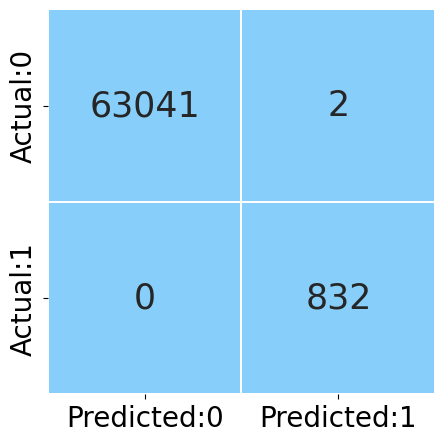

In [229]:
xgb = XGBClassifier(n_estimators=200, max_depth=2, learning_rate=0.1)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

print('classification report for tunned XGBClassifier')
print(classification_report(y_test,y_pred))
print()

plot_confusion_matrix(xgb,x_test,y_test)


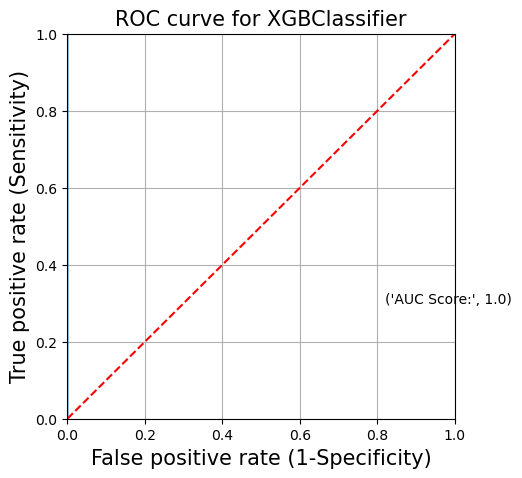

In [231]:
plot_roc_curve(xgb,x_test,y_test,'XGBClassifier')

**5.2. Hyperparameter tunning for Decision tree**

In [ ]:
 param_grid = {
    'criterion': ['gini', 'entropy'],     # Split quality criterion
    'max_depth':  np.arange(1,200),       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]}        # Minimum number of samples required to be at a leaf node

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

kf=KFold(n_splits=5,shuffle=True,random_state=0)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=kf, scoring='roc_auc')

# Fit the GridSearchCV object to the data

grid_search_dt.fit(x_train, y_train)  


#### Best hyperparameter of Decision tree

In [ ]:
# Retrieve the best parameters and best score
best_params_dt=grid_search_dt.best_params_

#### Building Decisiontree classifier model using tunned hyperparameter

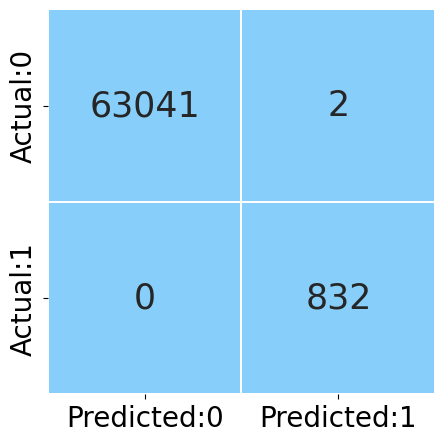


classification report for tunned Decisiontree classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63043
           1       1.00      1.00      1.00       832

    accuracy                           1.00     63875
   macro avg       1.00      1.00      1.00     63875
weighted avg       1.00      1.00      1.00     63875



In [170]:
decision_tree = DecisionTreeClassifier(max_depth=5,criterion='gini',min_samples_leaf=4,min_samples_split=2)
decision_tree.fit(x_train,y_train)

y_pred = decision_tree.predict(x_test)

plot_confusion_matrix(xgb,x_test,y_test)

print()
print('classification report for tunned Decisiontree classifier')
print()
print(classification_report(y_test,y_pred))
print()

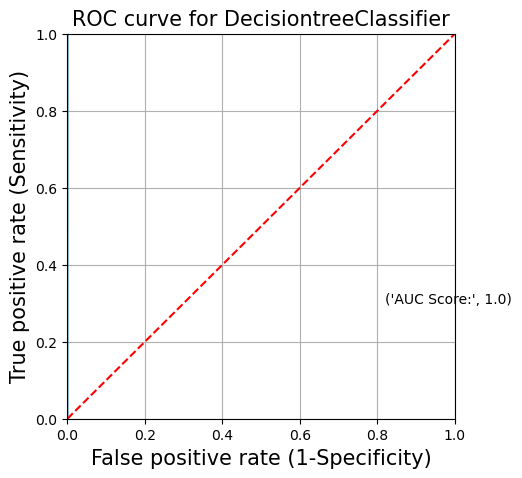

In [232]:
plot_roc_curve(decision_tree,x_test,y_test,'DecisiontreeClassifier')

.

**5.3. Hyperparameter tunning for RandomForestClassifier**

In [ ]:
param_grid = {
    'n_estimators': np.arange(1,200),        
    'criterion': ["gini", "entropy"],
    'min_samples_split':np.arange(1,6),    
    'min_samples_leaf': np.arange(1,6)}        


rfc =RandomForestClassifier()   

# Create the GridSearchCV 
kf=KFold(n_splits=5,shuffle=True,random_state=0)
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=kf, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search_rfc.fit(x_train,y_train)  


**Best hyperparameter of RandomForestClassifier**

In [190]:
best_params_rfc = grid_search_rfc.best_params_
best_params_rfc

{
    'n_estimators': 200,
    'criterion': 'gini',
    'min_samples_leaf': 4,
    'min_samples_split': 2
}


**Building RandomForestClassifier model using tunned hyperparameter**

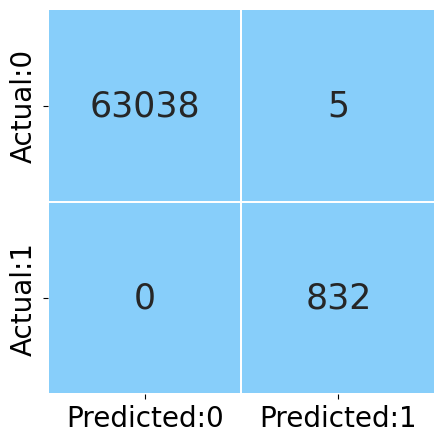


classification report for tunned RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63043
           1       0.99      1.00      1.00       832

    accuracy                           1.00     63875
   macro avg       1.00      1.00      1.00     63875
weighted avg       1.00      1.00      1.00     63875



In [177]:
# The RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators=200,criterion='gini',min_samples_split=4,min_samples_leaf=2)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
plot_confusion_matrix(random_forest,x_test,y_test)

print()
print('classification report for tunned RandomForestClassifier')
print()
print(classification_report(y_test,y_pred))


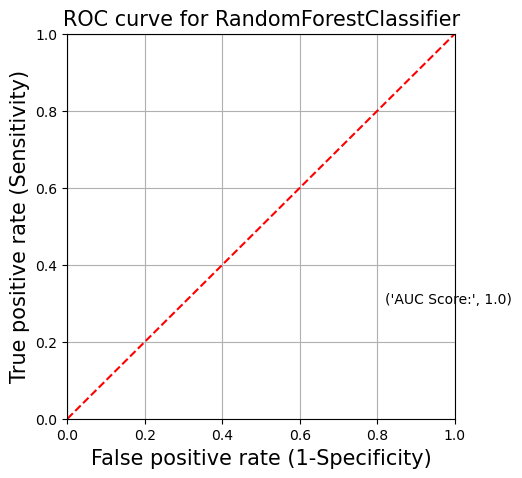

In [233]:
plot_roc_curve(random_forest,x_test,y_test,'RandomForestClassifier')

## 6.Bias and Varience error

XGBClassifier: 0.999953 (0.000012)
DecisionTree: 0.999966 (0.000012)
RandomForest: 0.999933 (0.000071)


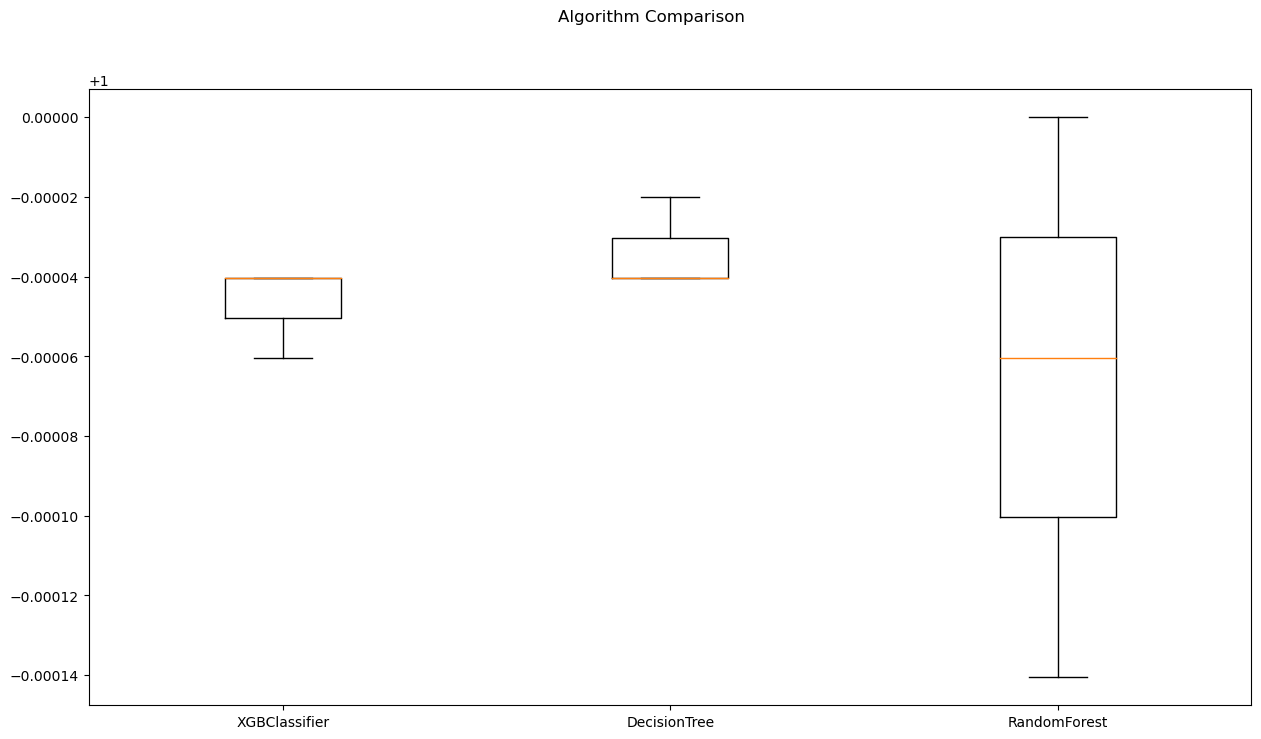

In [198]:
#finding bias and varience error for each model
models = []
models.append(('XGBClassifier',xgb))
models.append(('DecisionTree',decision_tree))
models.append(('RandomForest',random_forest))


# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, x_train, y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15,8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 7.Finding the final model

In [191]:
model = {
    'XGBClassifier':xgb,
    'DecisionTreeClassifier': decision_tree,
    'RandomForestClassifier':random_forest }

# create an empty dataframe of metrics
models_report = pd.DataFrame(columns=['Model_name','Accuracy','Recall','Precision',
                                    'f1_score'])

# fit and evaluate each model
for model, model_name in list(zip(model.values(), model.keys())):
    print('Fitting Classifier....', model_name)
    y_pred=model.predict(x_test)
    t=pd.Series({
        'Model_name':model_name,
        'Accuracy':accuracy_score(y_test, y_pred),
        'Recall':recall_score(y_test, y_pred),
        'Precision':precision_score(y_test, y_pred),
        'f1_score':f1_score(y_test, y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report

Fitting Classifier.... XGBClassifier
Fitting Classifier.... DecisionTreeClassifier
Fitting Classifier.... RandomForestClassifier


,Model_name,Accuracy,Recall,Precision,f1_score
0,XGBClassifier,0.999969,1.0,0.997602,0.998800
1,DecisionTreeClassifier,0.999937,1.0,0.995215,0.997602
2,RandomForestClassifier,0.999922,1.0,0.994026,0.997004


In [ ]:
# for XGBclassifier the accuracy,recall,precision,f1_score is high after tunning also
# so choosing xgbclassifier as final model

### Choosing XGB classifier as final model

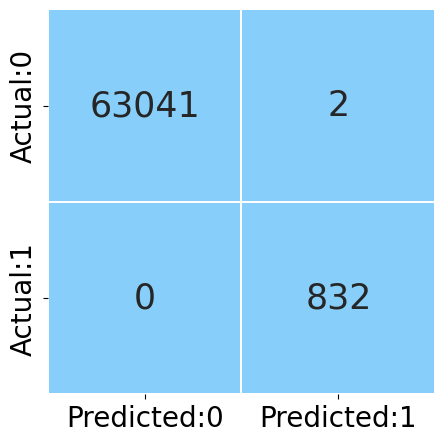

In [192]:
# finding confusion matrix
plot_confusion_matrix(xgb,x_test,y_test)

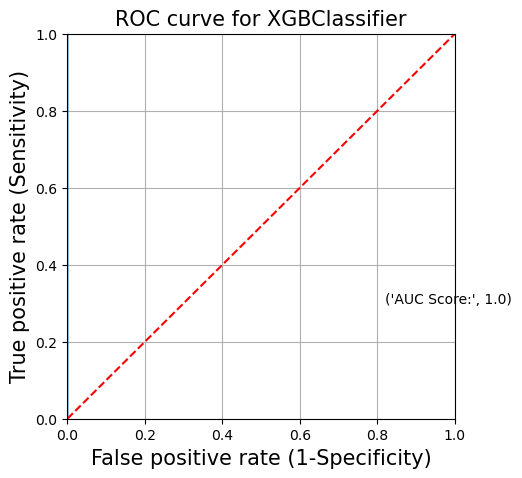

In [235]:
plot_roc_curve(xgb,x_test,y_test,'XGBClassifier')